In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('C:/Users/ranja/Downloads/car data.csv')

In [3]:
def check_data(df,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(df.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(df.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(df.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(df.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(df.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)
    
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
--------------------     Data Shape     --------------------
(301, 9)

--------------------  The First 5 Data  --------------------
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      

In [4]:
#Describe function
df.describe().style.background_gradient(cmap='winter')

In [5]:
set(df.duplicated())

{False, True}

In [6]:
df.duplicated().sum()

2

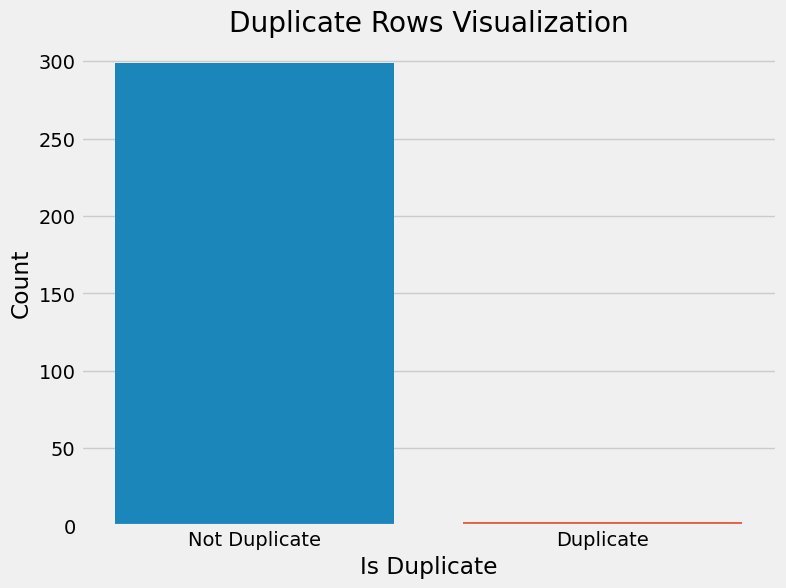

In [7]:
# Check for duplicates and create a new column "Is_Duplicate"
df['Is_Duplicate'] = df.duplicated()

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize duplicates
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Duplicate', data=df)
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.title('Duplicate Rows Visualization')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])  # Customize x-axis labels
plt.show()

# Drop the "Is_Duplicate" column if not needed
df.drop(columns=['Is_Duplicate'], inplace=True)

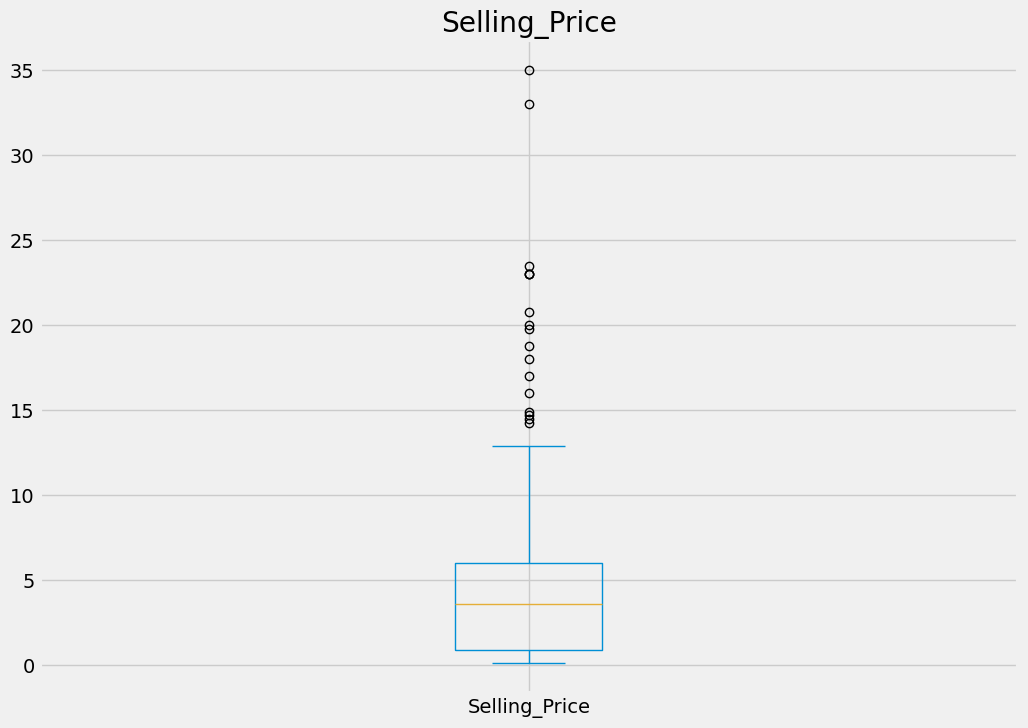

In [8]:
# finding outliers

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[['Selling_Price']].plot(kind='box', title='Selling_Price')

# Display the plot
plt.show()

In [9]:
#Function used to detect outliers

def detecting_Outliers(x, limit = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limit_inf = np.maximum(np.percentile(x, 25) - limit * iqr, np.min(x))
    limit_sup = np.minimum(np.percentile(x, 75) + limit * iqr, np.max(x))
    return np.where((x < limit_inf) | (x > limit_sup), 1, 0)

# mapping outliers on selling price

df["Selling_Price_outliers"] = detecting_Outliers(df.Selling_Price)

df.sort_values(by='Selling_Price_outliers', ascending=False)

Car_Name  Year  Selling_Price  Present_Price  \
79                    fortuner  2012          14.50          30.61   
96                      innova  2016          20.75          25.39   
50                    fortuner  2012          14.90          30.61   
51                    fortuner  2015          23.00          30.61   
52                      innova  2017          18.00          19.77   
..                         ...   ...            ...            ...   
117  Royal Enfield Thunder 500  2015           1.10           1.90   
118  Royal Enfield Classic 350  2015           1.10           1.47   
119  Royal Enfield Thunder 500  2013           1.05           1.90   
120         Bajaj Pulsar RS200  2016           1.05           1.26   
300                       brio  2016           5.30           5.90   

     Driven_kms Fuel_Type Selling_type Transmission  Owner  \
79        89000    Diesel       Dealer    Automatic      0   
96        29000    Diesel       Dealer    Automatic      0   
50       104707    Diesel       Dealer    Automatic      0   
51        40000    Diesel       Dealer    Automatic      0   
52        15000    Diesel       Dealer    Automatic      0   
..          ...       ...          ...          ...    ...   
117       14000    Petrol   Individual       Manual      0   
118       26000    Petrol   Individual       Manual      0   
119        5400    Petrol   Individual       Manual      0   
120        5700    Petrol   Individual       Manual      0   
300        5464    Petrol       Dealer       Manual      0   

     Selling_Price_outliers  
79                        1  
96                        1  
50                        1  
51                        1  
52                        1  
..                      ...  
117                       0  
118                       0  
119                       0  
120                       0  
300                       0  

[301 rows x 10 columns]

In [10]:
# understanding the impact of selling price outliers on the dataset 

print((df.groupby(by=['Selling_Price_outliers'])['Selling_Price_outliers'].count()/df.shape[0])*100.00)

print(df.groupby(by=['Selling_Price_outliers'])['Selling_Price_outliers'].count())

Selling_Price_outliers
0    94.352159
1     5.647841
Name: Selling_Price_outliers, dtype: float64
Selling_Price_outliers
0    284
1     17
Name: Selling_Price_outliers, dtype: int64


In [11]:
corr=df.corr().style.background_gradient(cmap='gray')
corr

<Axes: >

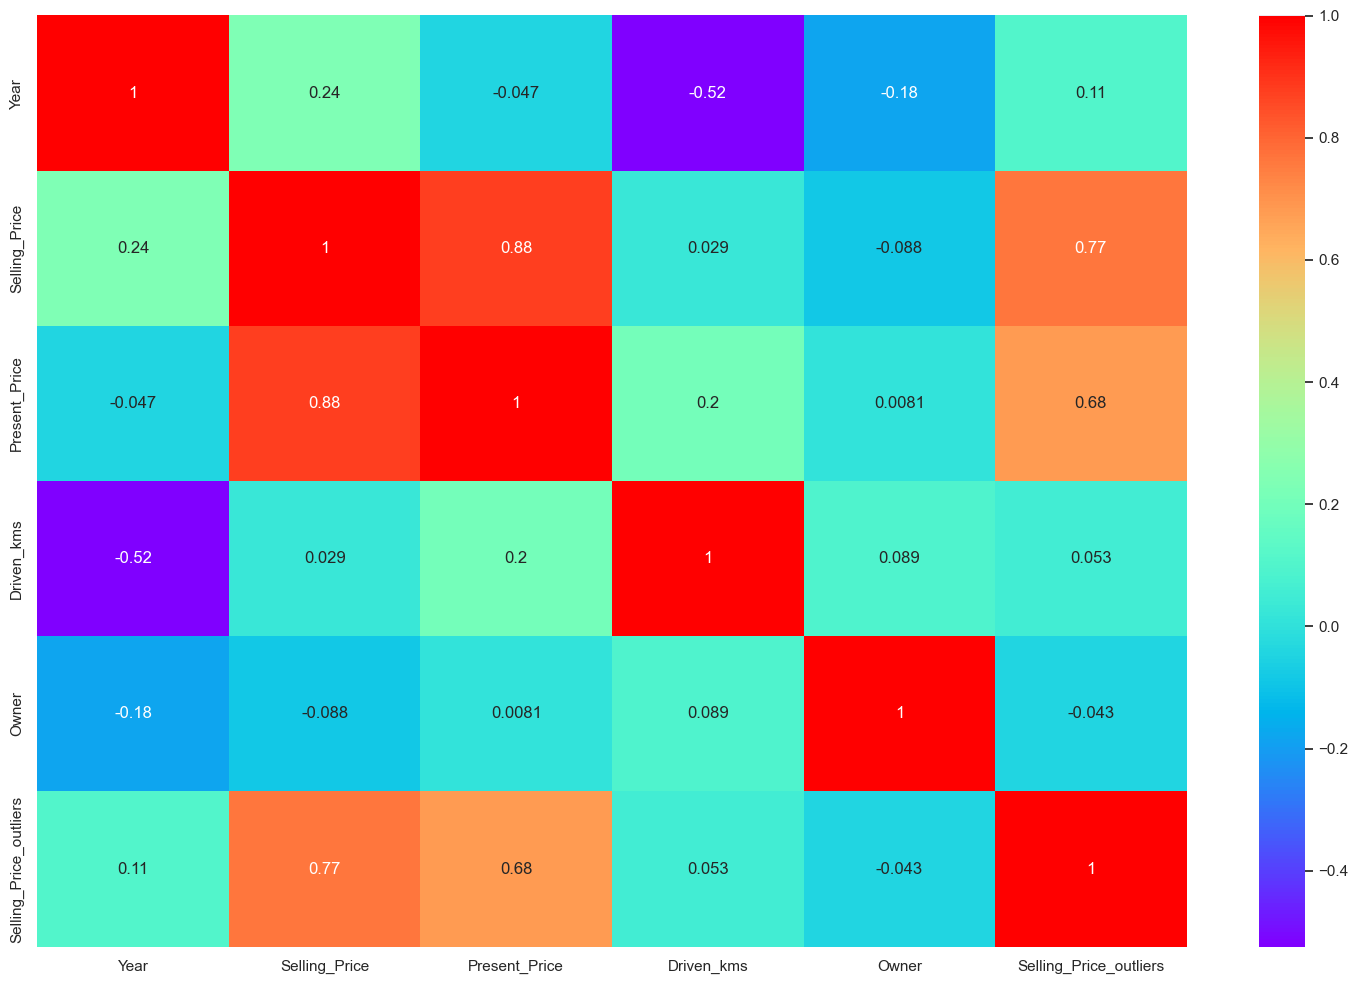

In [12]:
#Let's visualize the correlation matrix iin the seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

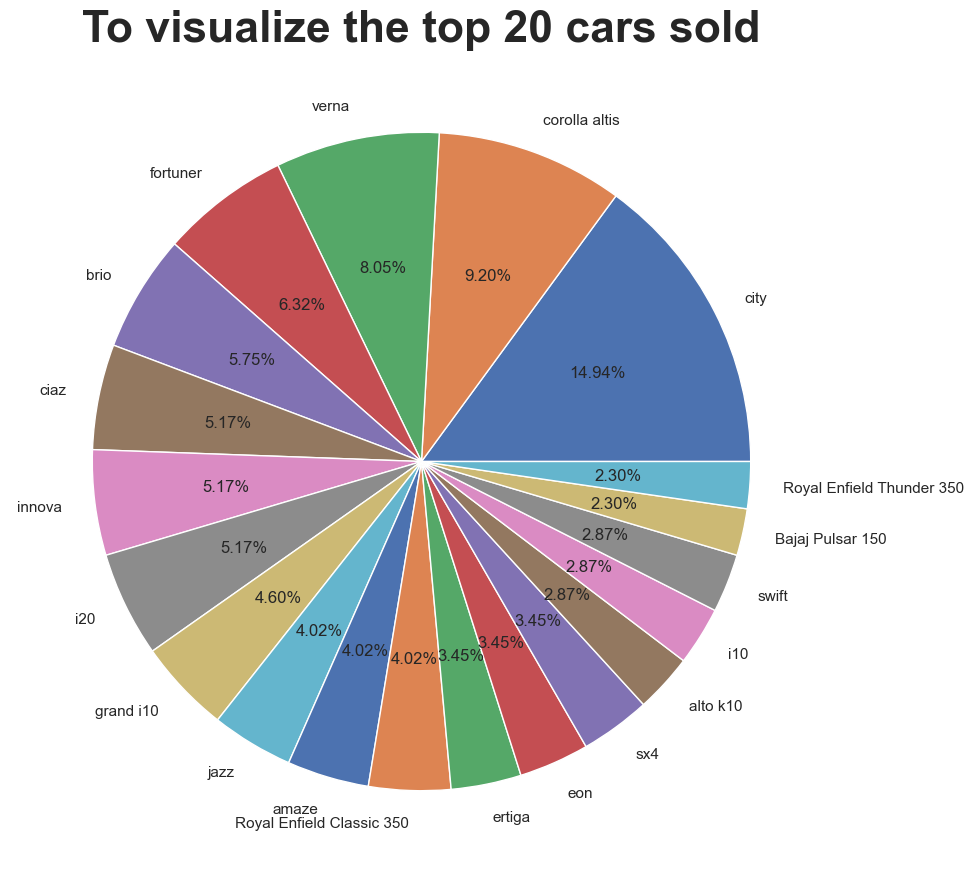

In [13]:
#Let's visualize the car names in the dataset
car_names=df['Car_Name'].value_counts()
#To visualize the top 20 car's sold
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(16,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()

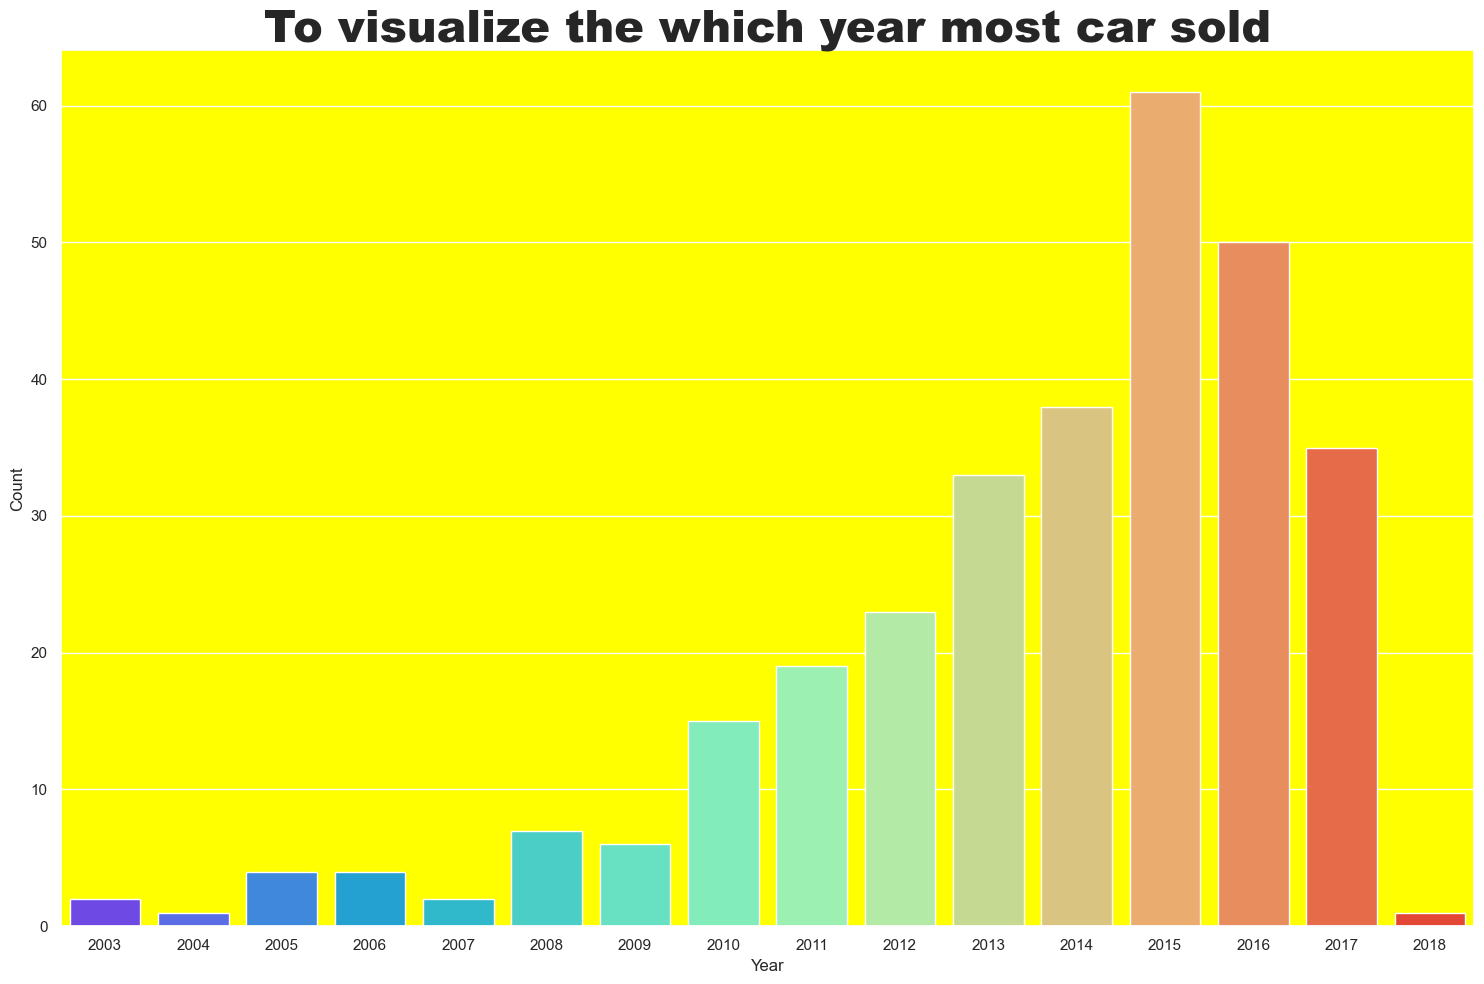

In [14]:
# To visualize the year in the dataset
year=df['Year'].value_counts()
#to visualize the year in the seaborn barplot
ax=plt.axes()
#set the background color
ax.set(facecolor='yellow')
#set the figures size 
sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the which year most car sold",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.barplot(x=year.index,y=year,palette='rainbow')
#on the x axis
plt.xlabel("Year")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

In [15]:
df['Car_age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

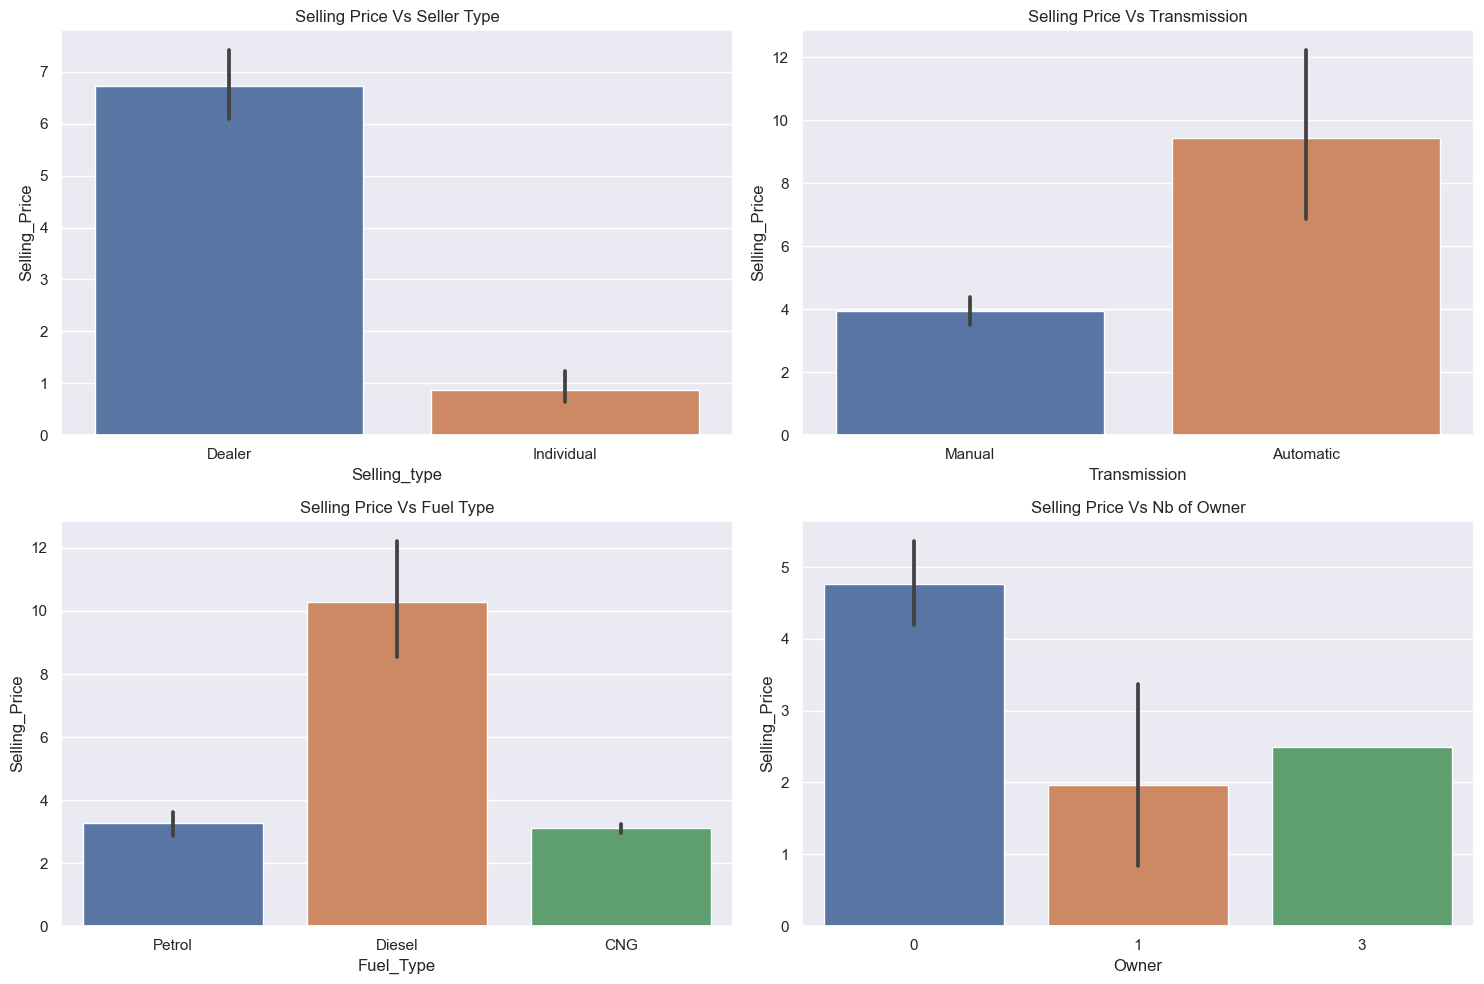

In [16]:
# Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

<Axes: xlabel='Selling_Price'>

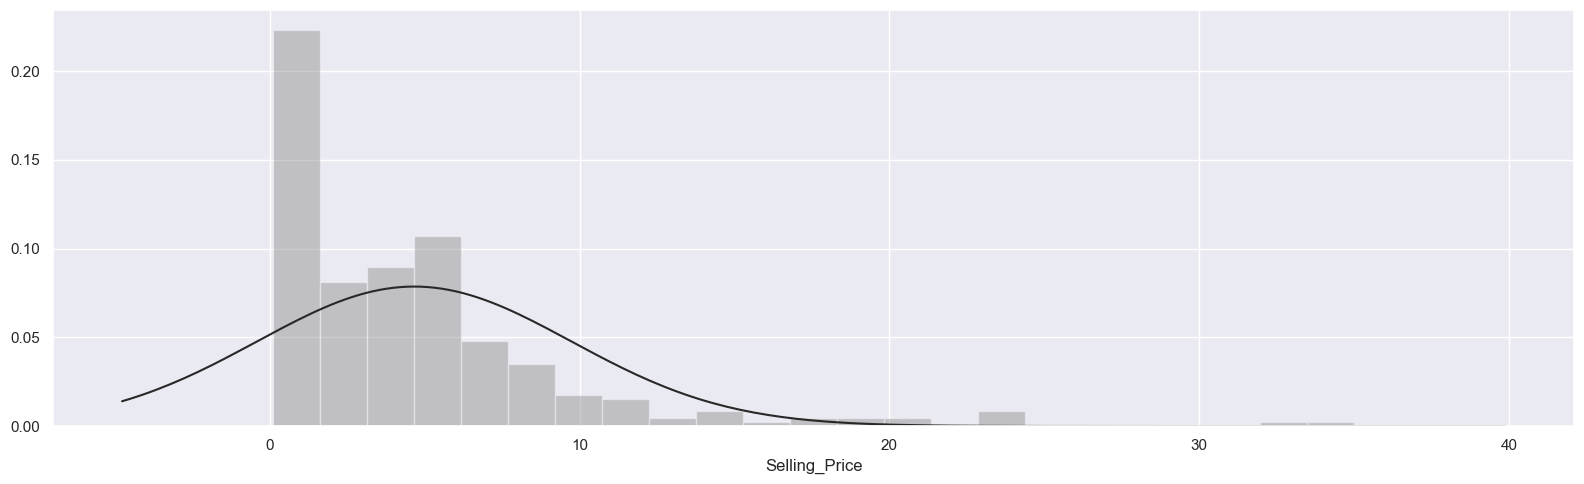

In [17]:
from scipy.stats import norm
#Visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
#to visualize the Selling_Price in the dataset
sns.distplot(df['Selling_Price'],fit=norm,kde=False,color='gray')

<Axes: xlabel='Selling_Price', ylabel='Density'>

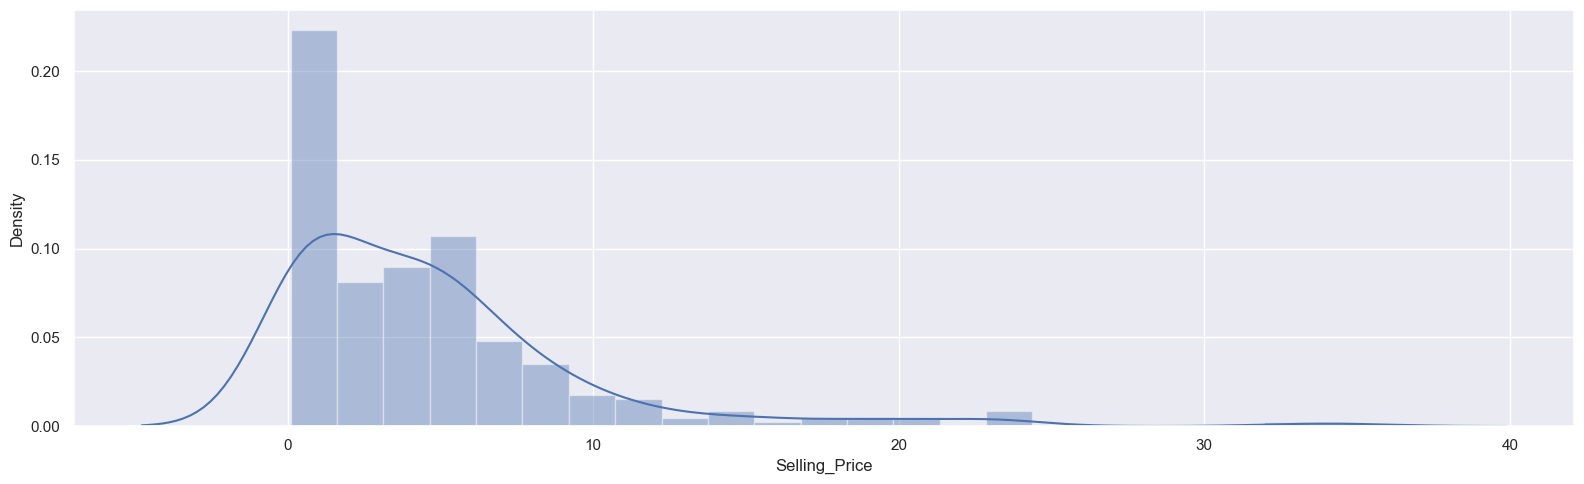

In [18]:
sns.distplot(df['Selling_Price'])

Text(0.5, 1.0, 'Selling Price Vs Car Age')

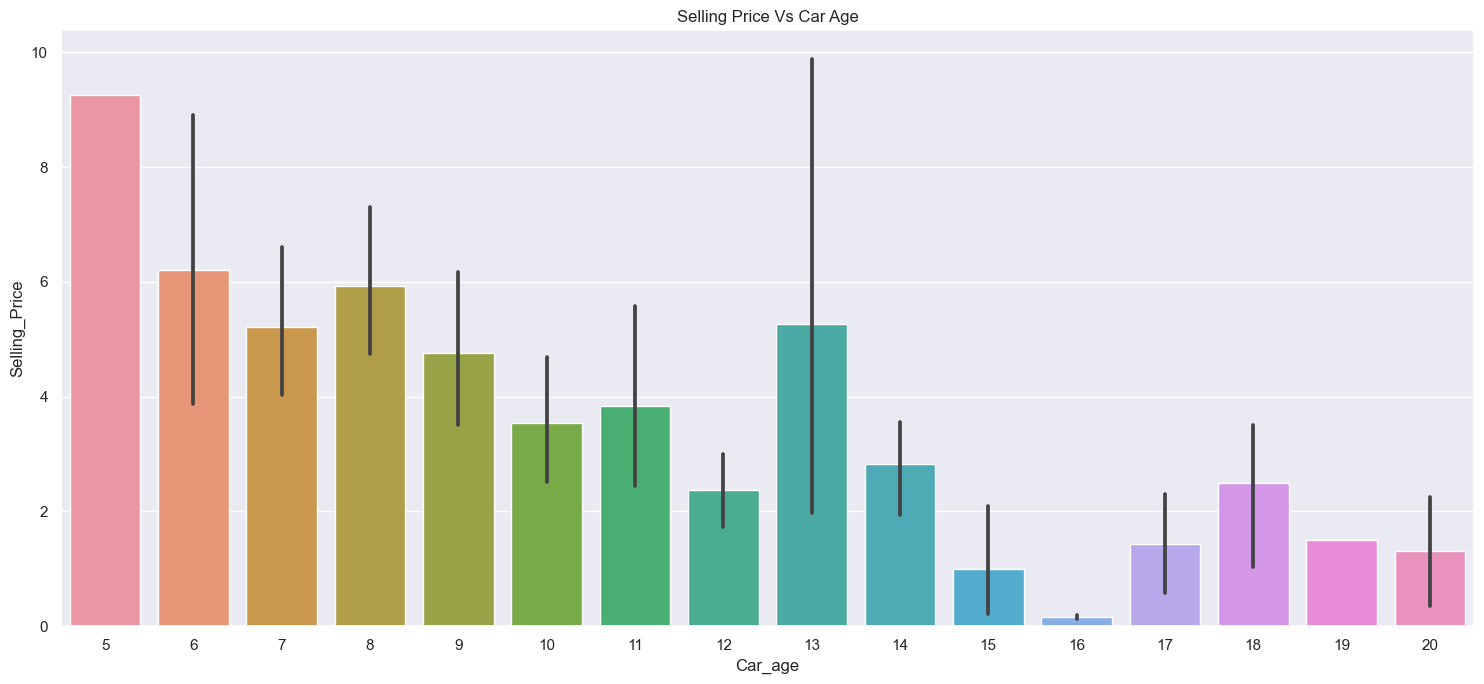

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

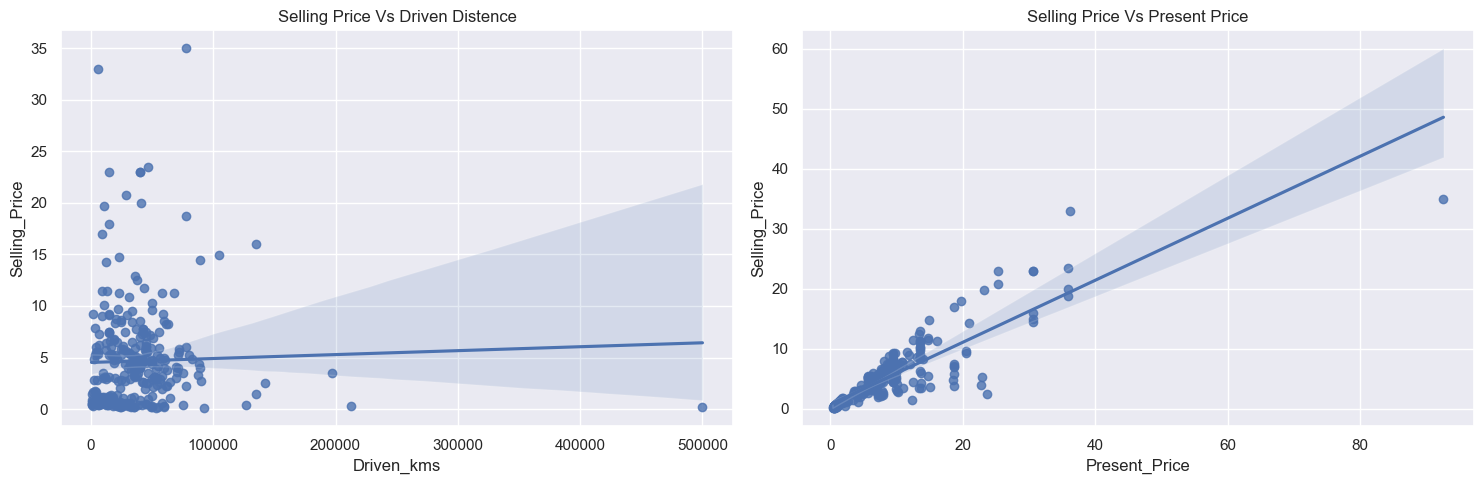

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')

plt.subplot(1,2,2)
sns.regplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()

<Axes: xlabel='Present_Price', ylabel='Count'>

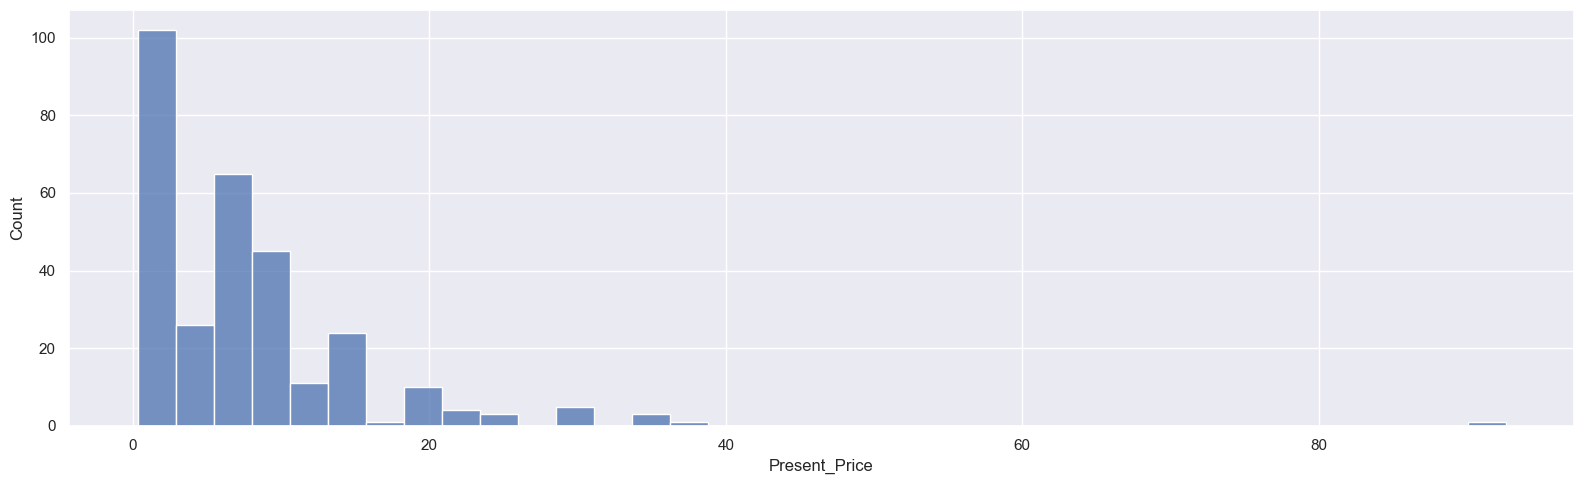

In [21]:
sns.histplot(x="Present_Price",data=df)

<Axes: xlabel='Present_Price'>

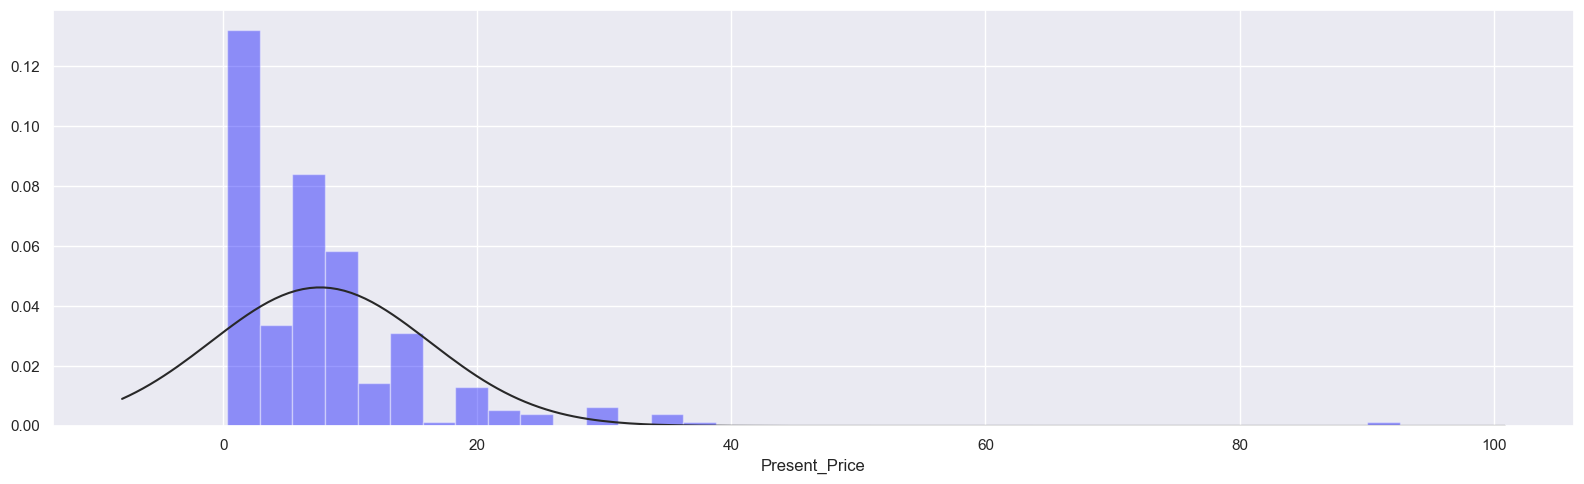

In [22]:
#Visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
#to visualize the Present_Price in the dataset
sns.distplot(df['Present_Price'],fit=norm,kde=False,color='blue')

In [23]:
#Let's visualize the scatter plot
import plotly.express as px
fig=px.scatter(df,y='Selling_Price',x='Present_Price')
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='yellow')
fig.show()

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

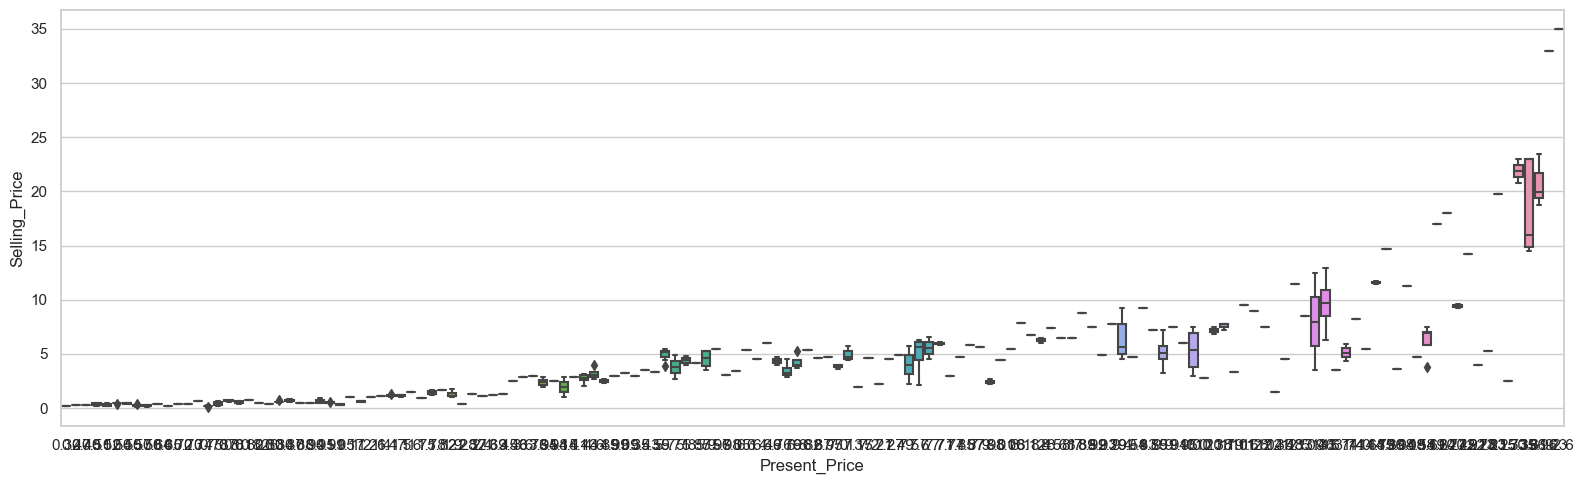

In [24]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(x = 'Present_Price', y = 'Selling_Price', data = df)

<Axes: xlabel='Selling_type', ylabel='Present_Price'>

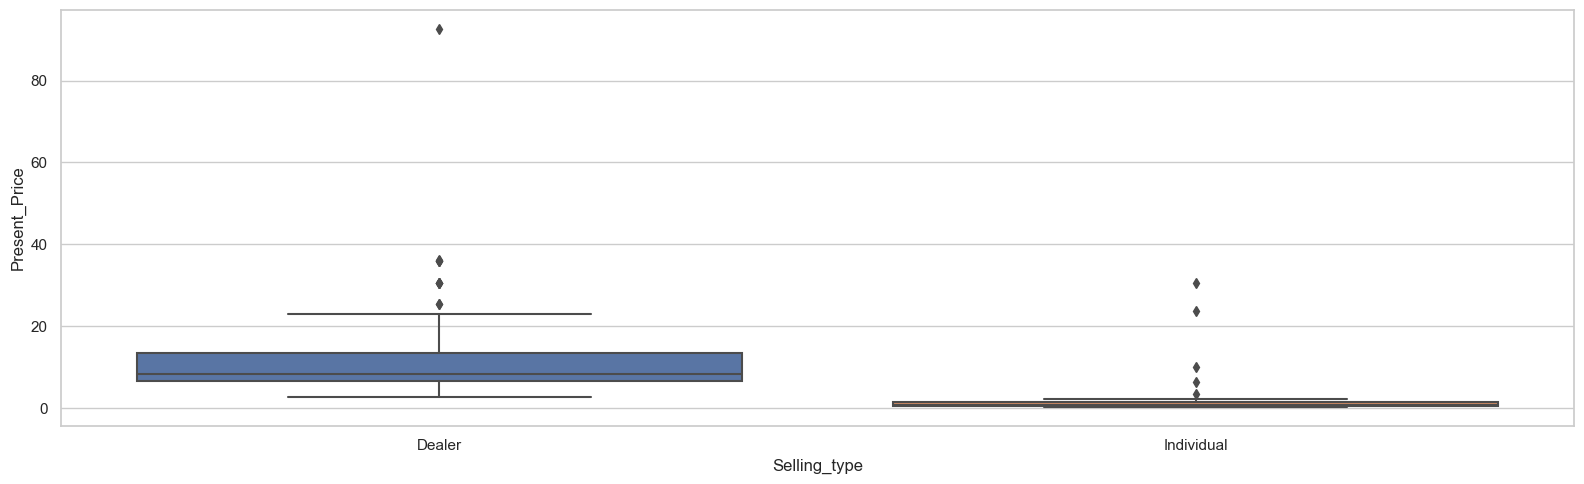

In [25]:
sns.set_style("whitegrid")
sns.boxplot(y ='Present_Price', x = 'Selling_type', data = df)

<Axes: xlabel='Car_Name', ylabel='Selling_Price'>

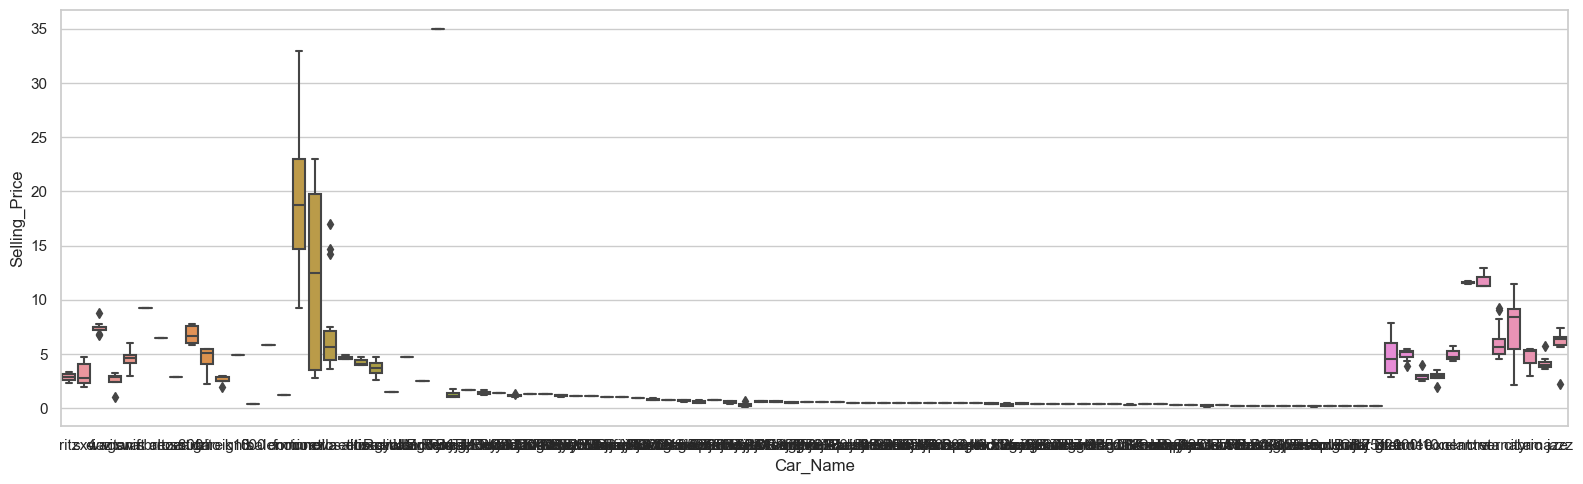

In [26]:
sns.set_style("whitegrid")
sns.boxplot(x ='Car_Name',y ='Selling_Price', data = df)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

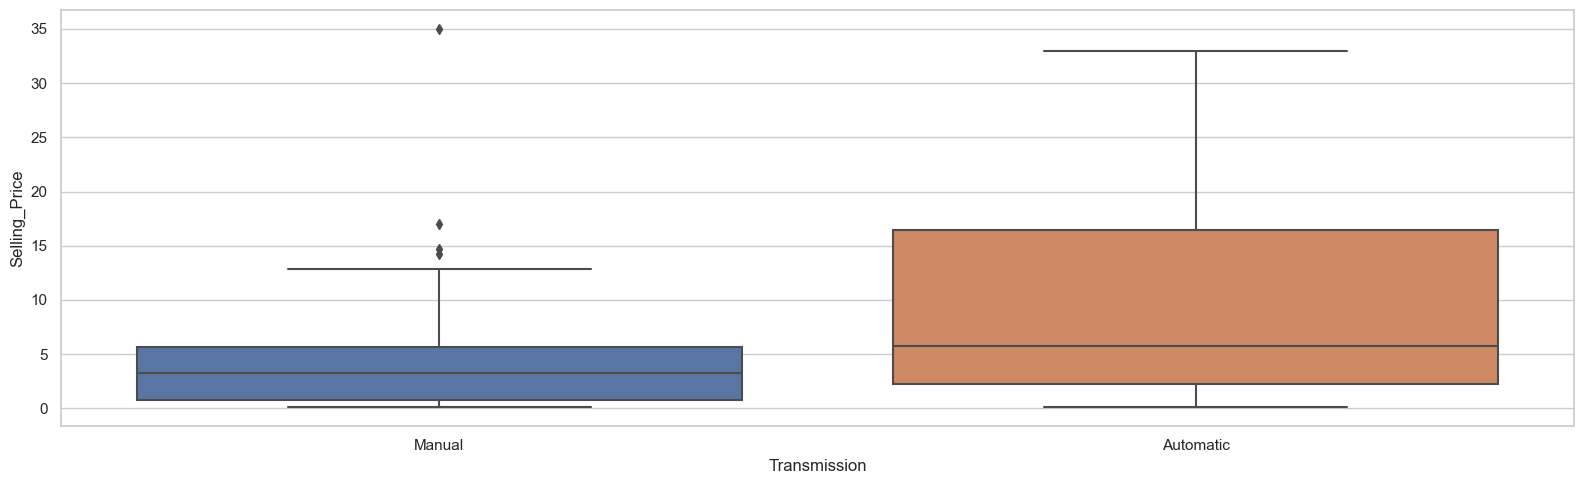

In [27]:
sns.set_style("whitegrid")
sns.boxplot(y ='Selling_Price', x = 'Transmission', data = df)

<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

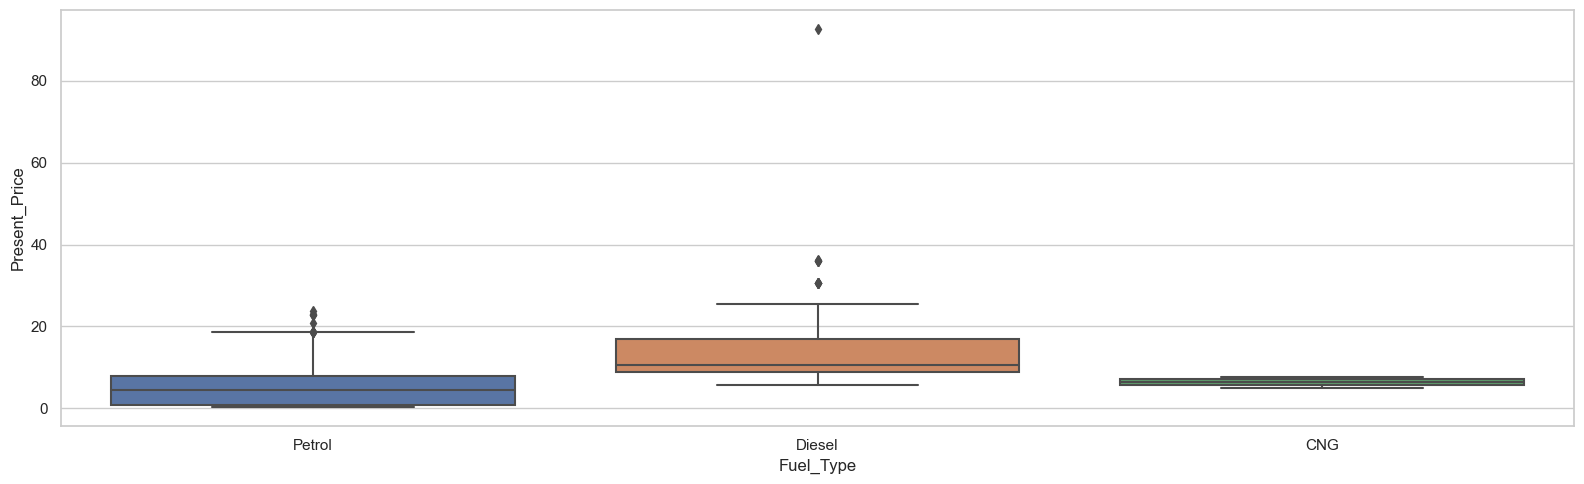

In [28]:
sns.set_style("whitegrid")
sns.boxplot(y = 'Present_Price', x = 'Fuel_Type', data = df)

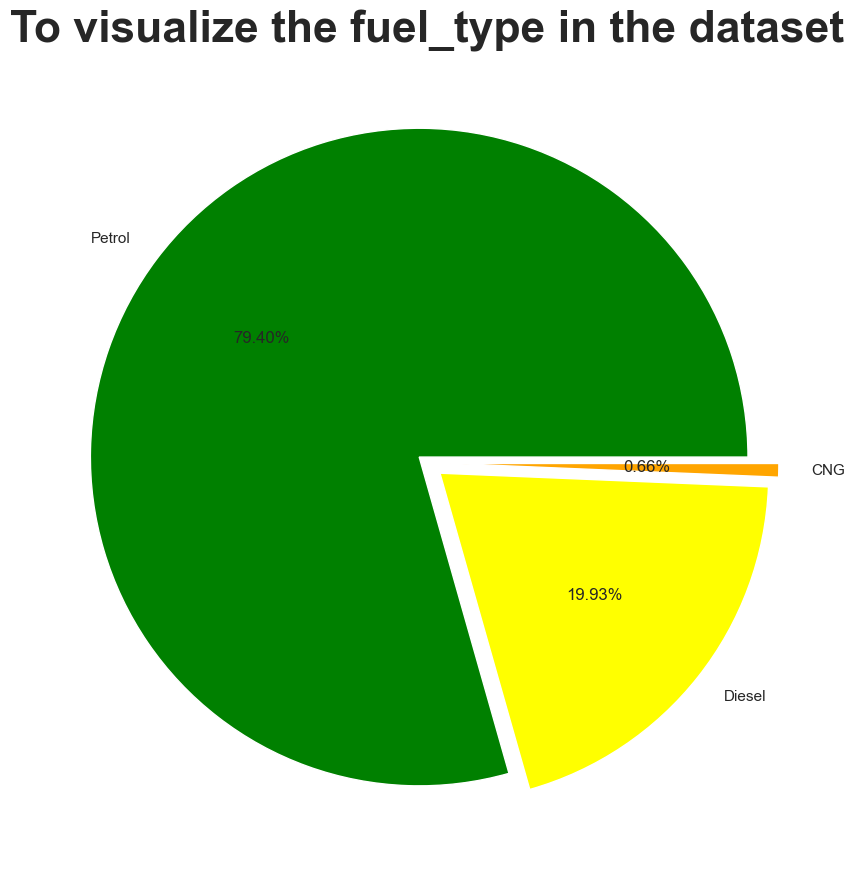

In [29]:
# Let's visualize the car names in the dataset
fuel_type=df['Fuel_Type'].value_counts()
#To visualize the top 20 car's sold
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(16,9))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['green','yellow','orange'])
plt.title("To visualize the fuel_type in the dataset",fontsize=32,fontweight='bold')
plt.show()

In [30]:
cat_col = ['Fuel_Type','Selling_type','Transmission','Car_Name']
for i in cat_col:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [31]:
# Dealing With Categorical Variables, creating dummie

df = df.drop(labels='Car_Name', axis=1)
col = ['Fuel_Type','Selling_type','Transmission']
df_new = pd.concat([df]+[pd.get_dummies(df[i],drop_first=True,prefix=i+'_') for i in col],axis=1)
df_new.drop(['Fuel_Type','Selling_type','Transmission'],axis=1,inplace=True)
df_new.head()

Selling_Price  Present_Price  Driven_kms  Owner  Selling_Price_outliers  \
0           3.35           5.59       27000      0                       0   
1           4.75           9.54       43000      0                       0   
2           7.25           9.85        6900      0                       0   
3           2.85           4.15        5200      0                       0   
4           4.60           6.87       42450      0                       0   

   Car_age  Fuel_Type__Diesel  Fuel_Type__Petrol  Selling_type__Individual  \
0        9                  0                  1                         0   
1       10                  1                  0                         0   
2        6                  0                  1                         0   
3       12                  0                  1                         0   
4        9                  1                  0                         0   

   Transmission__Manual  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

In [32]:
# Checking Multicollinearity Using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_new[['Present_Price','Driven_kms','Owner','Car_age','Fuel_Type__Diesel','Fuel_Type__Petrol','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF                  Features
0   3.211044             Present_Price
1   2.888998                Driven_kms
2   1.086964                     Owner
3  16.194782                   Car_age
4   5.395420         Fuel_Type__Diesel
5  16.933491         Fuel_Type__Petrol
6   2.231970  Selling_type__Individual
7   8.440614      Transmission__Manual

In [33]:
# Car_age and fuel_type_petrol feature has high VIF
df_no_multicolinearity = df_new.drop(['Driven_kms','Fuel_Type__Petrol'],axis=1)

# cheking again after removing some correlated feature
variables = df_new[['Present_Price','Driven_kms','Owner','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF                  Features
0  2.200856             Present_Price
1  1.883550                Driven_kms
2  1.065891                     Owner
3  1.669331         Fuel_Type__Diesel
4  1.748706  Selling_type__Individual
5  2.465837      Transmission__Manual

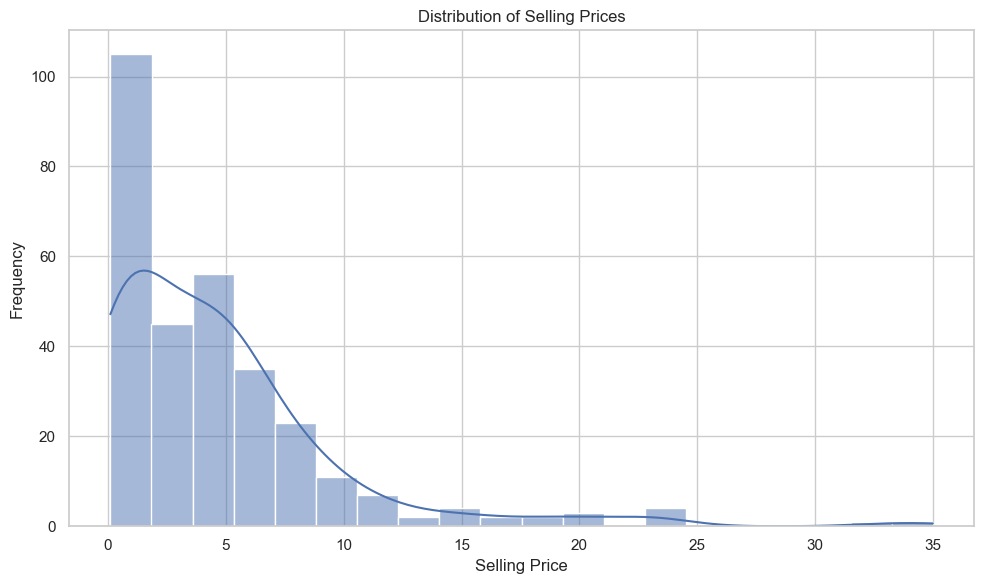

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()

<Axes: >

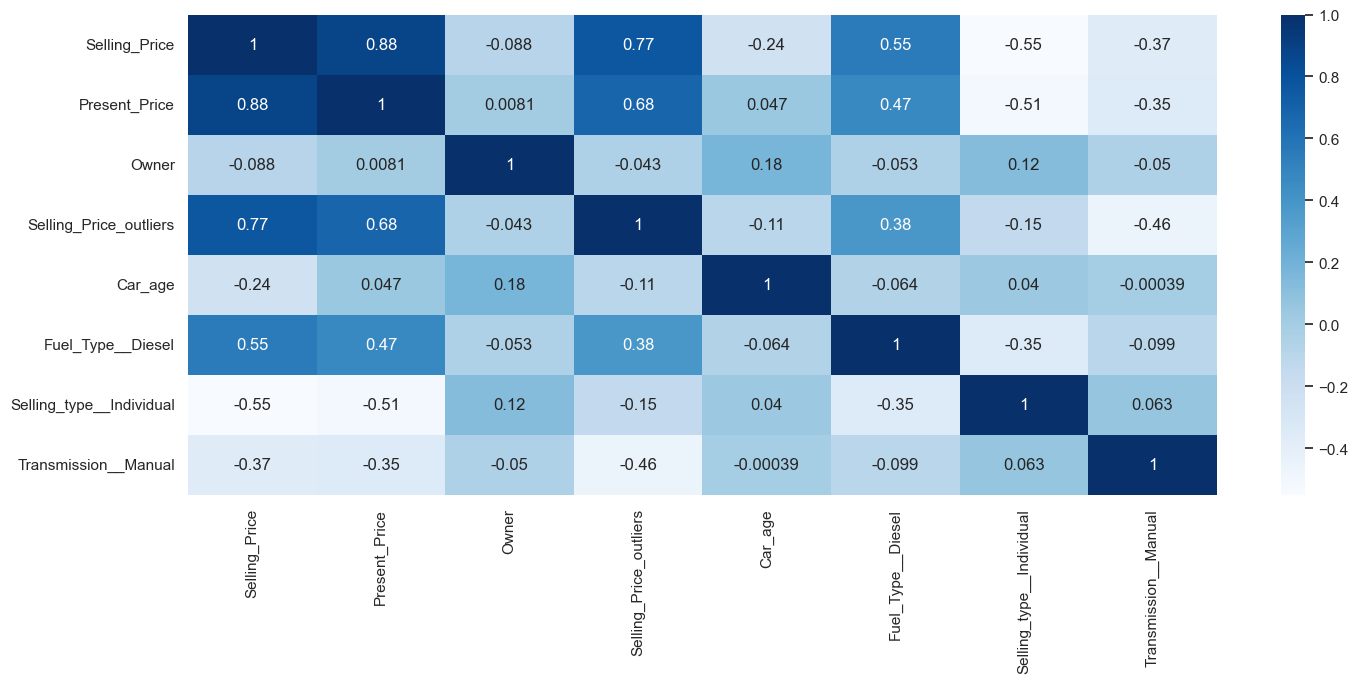

In [35]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(df_no_multicolinearity.corr(), annot=True,cmap='Blues')

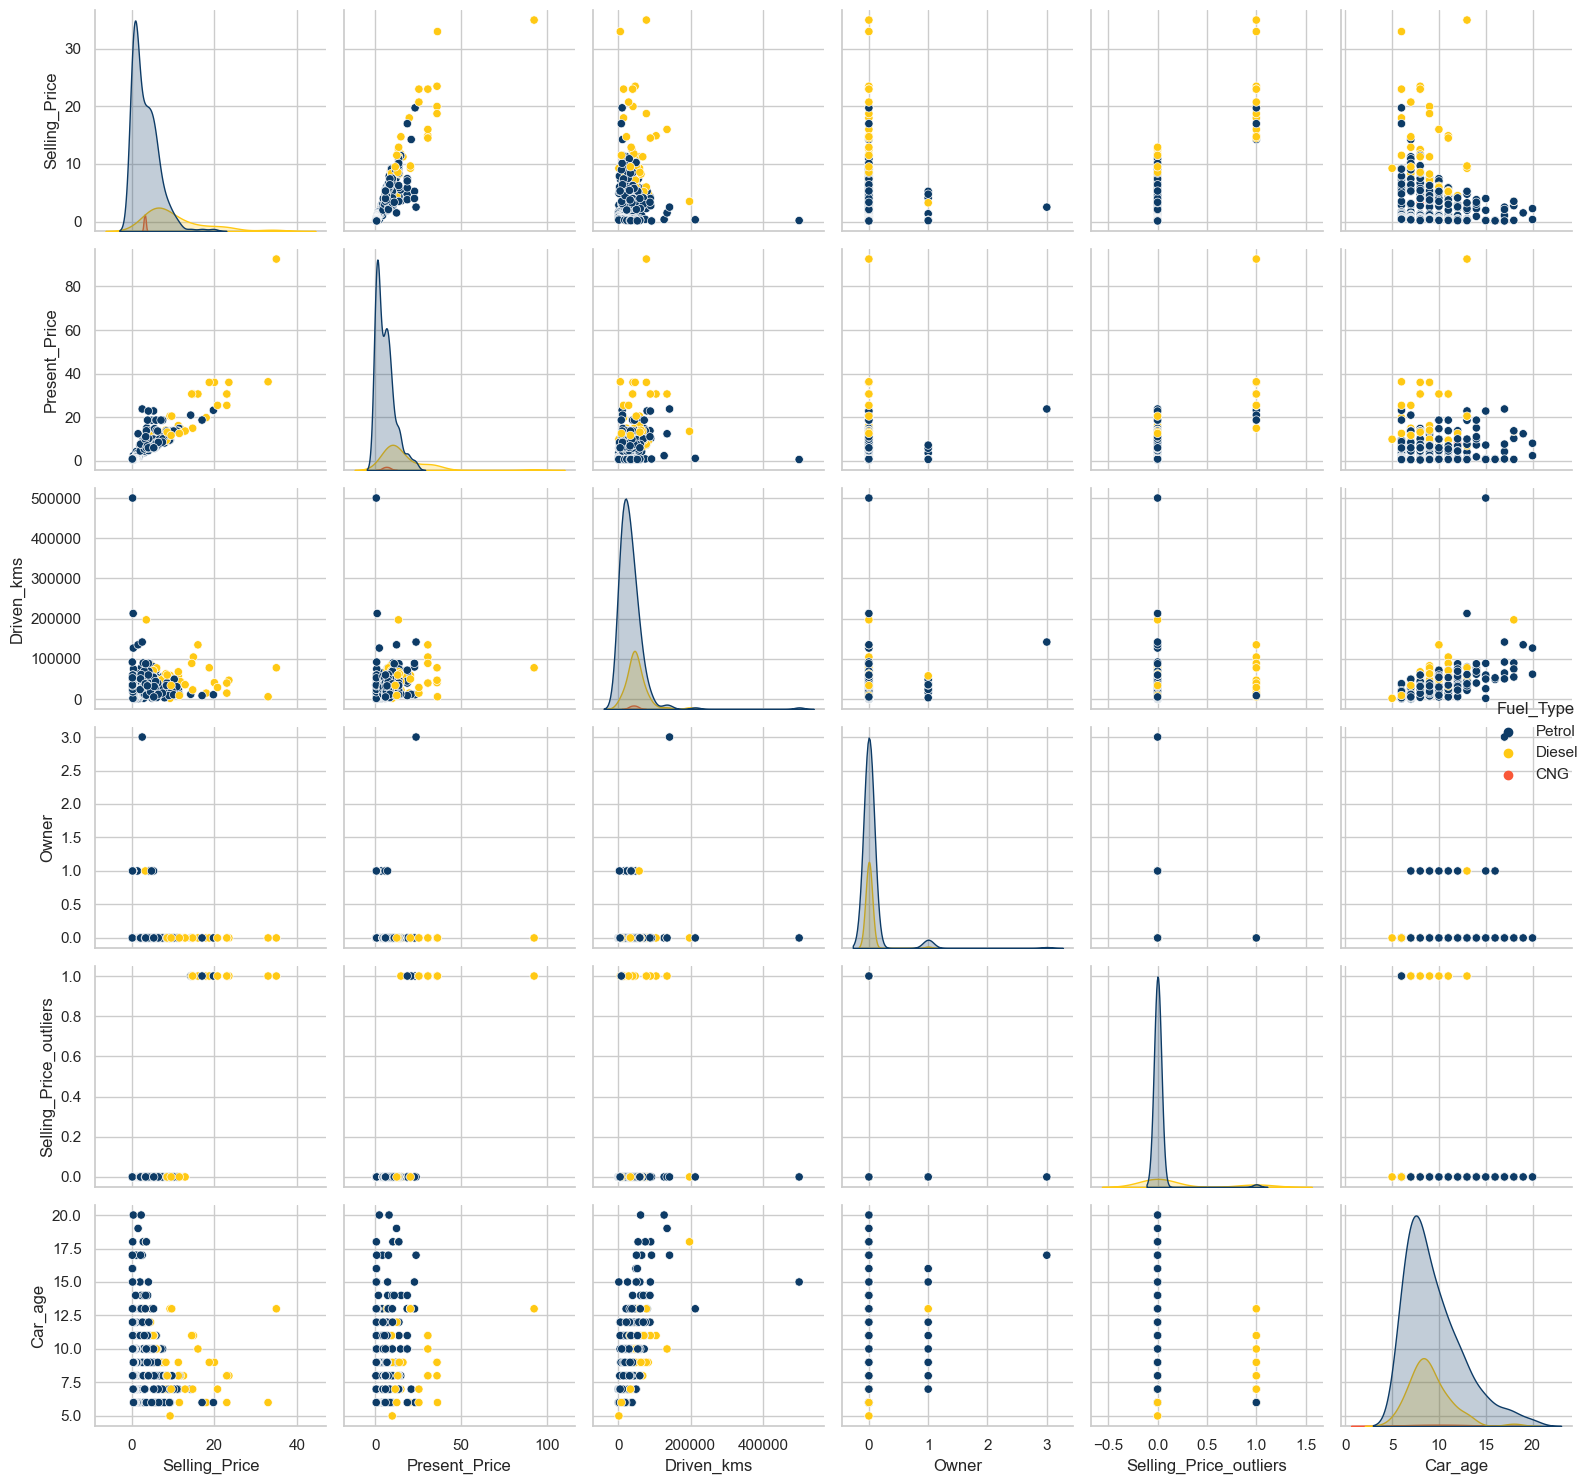

In [36]:
sns.pairplot(df, hue='Fuel_Type',palette=['#0D3B66', '#FFC914','#F95738'])
plt.show()

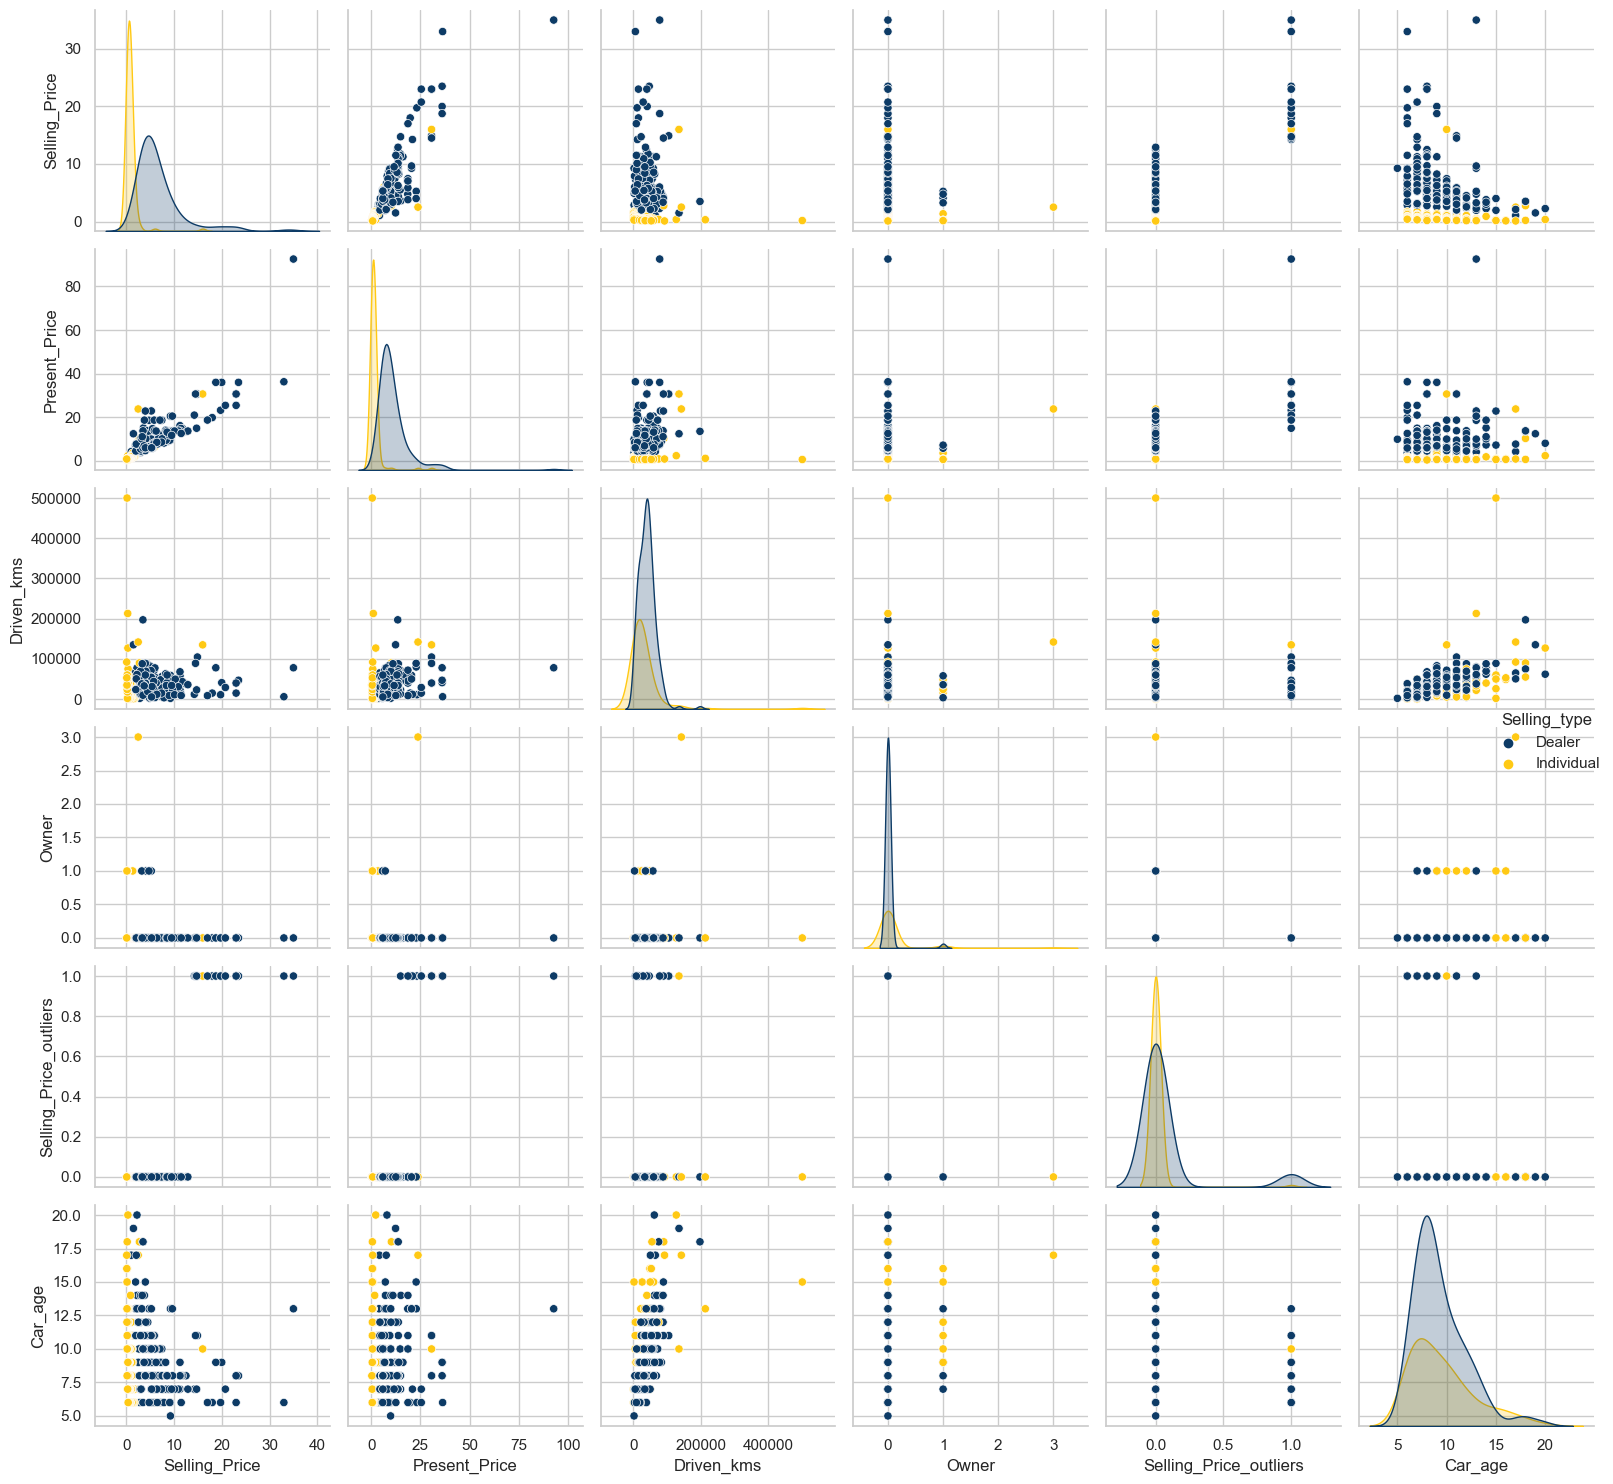

In [37]:
sns.pairplot(df, hue='Selling_type',palette=['#0D3B66', '#FFC914'])
plt.show()

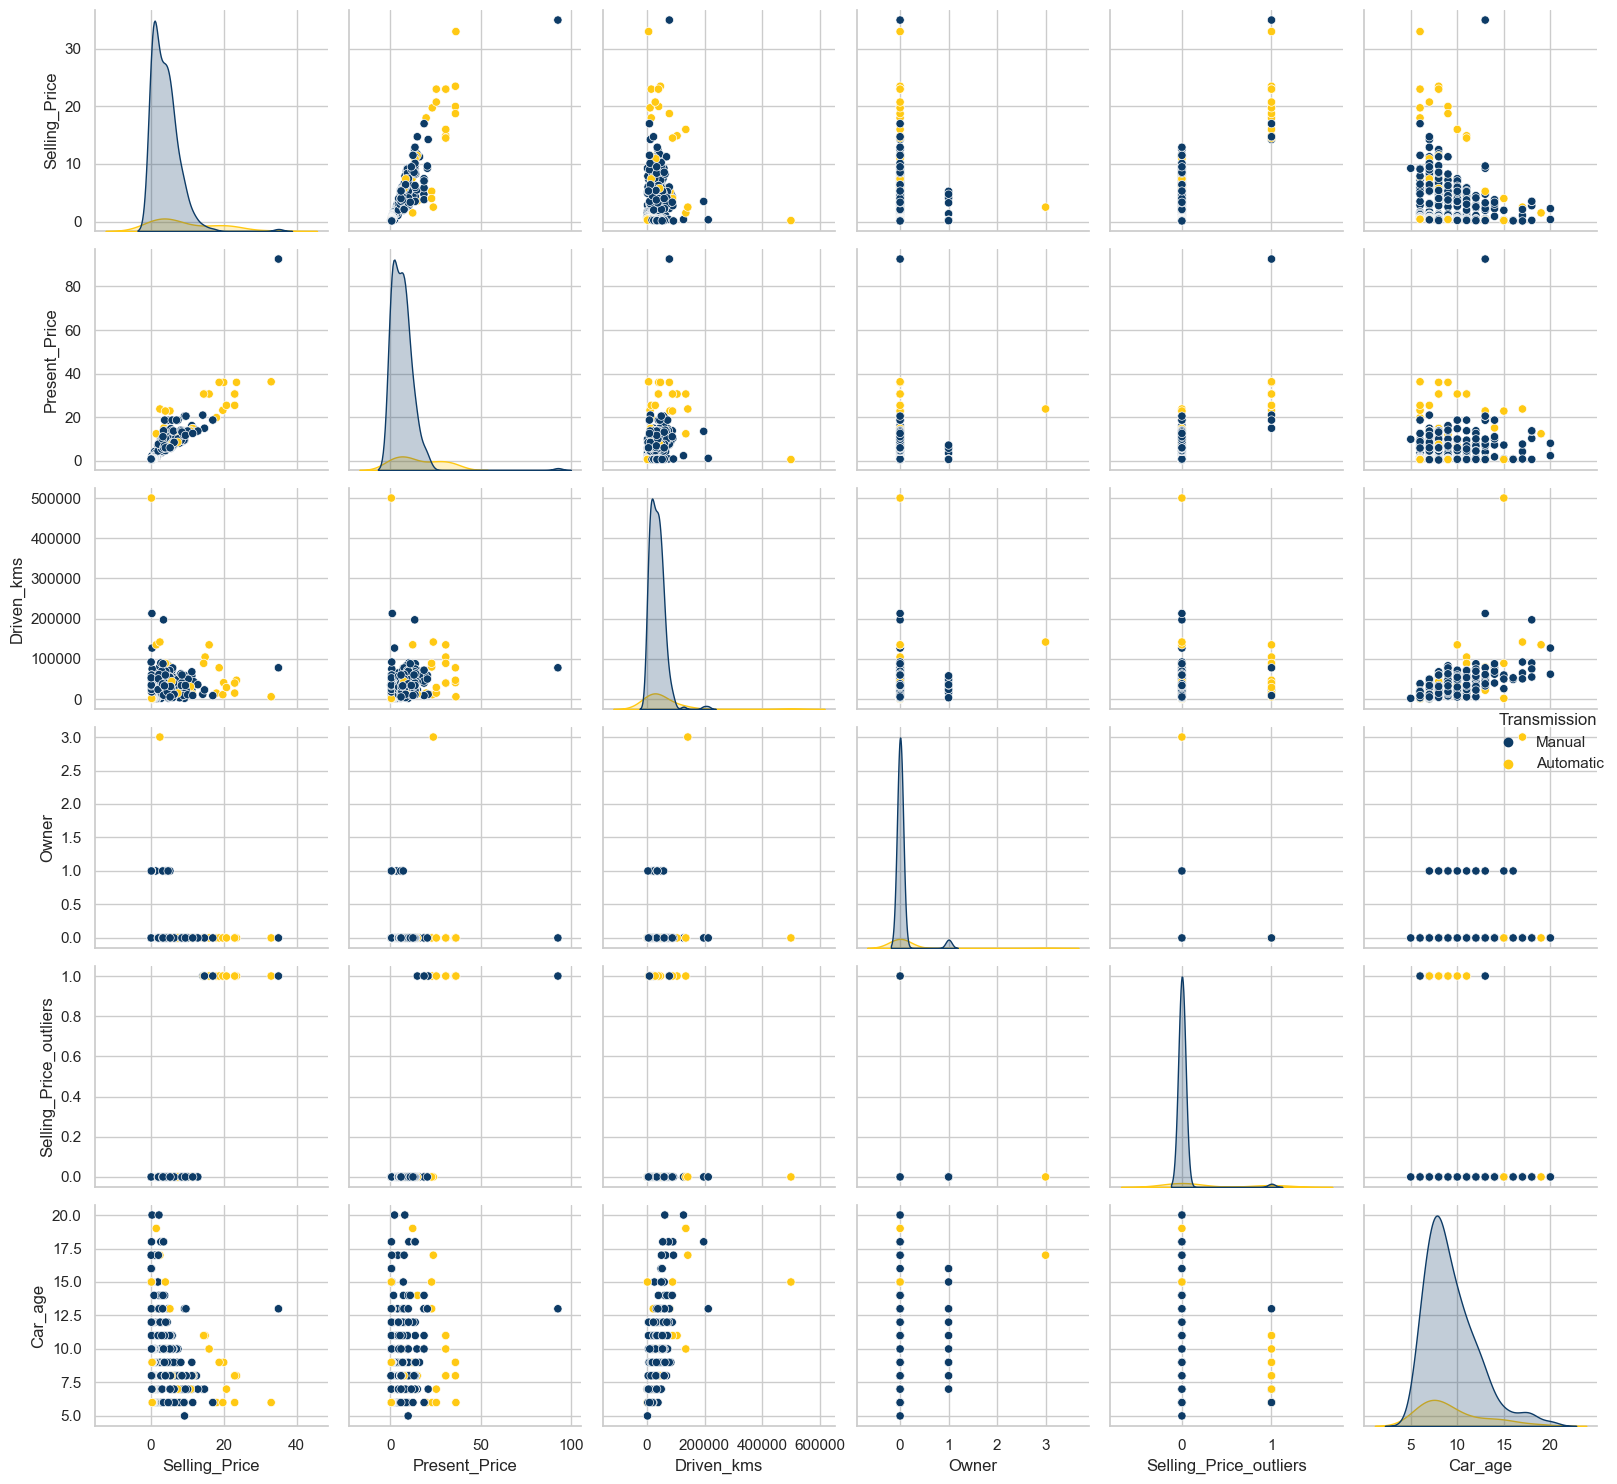

In [38]:
sns.pairplot(df, hue='Transmission',palette=['#0D3B66', '#FFC914'])
plt.show()

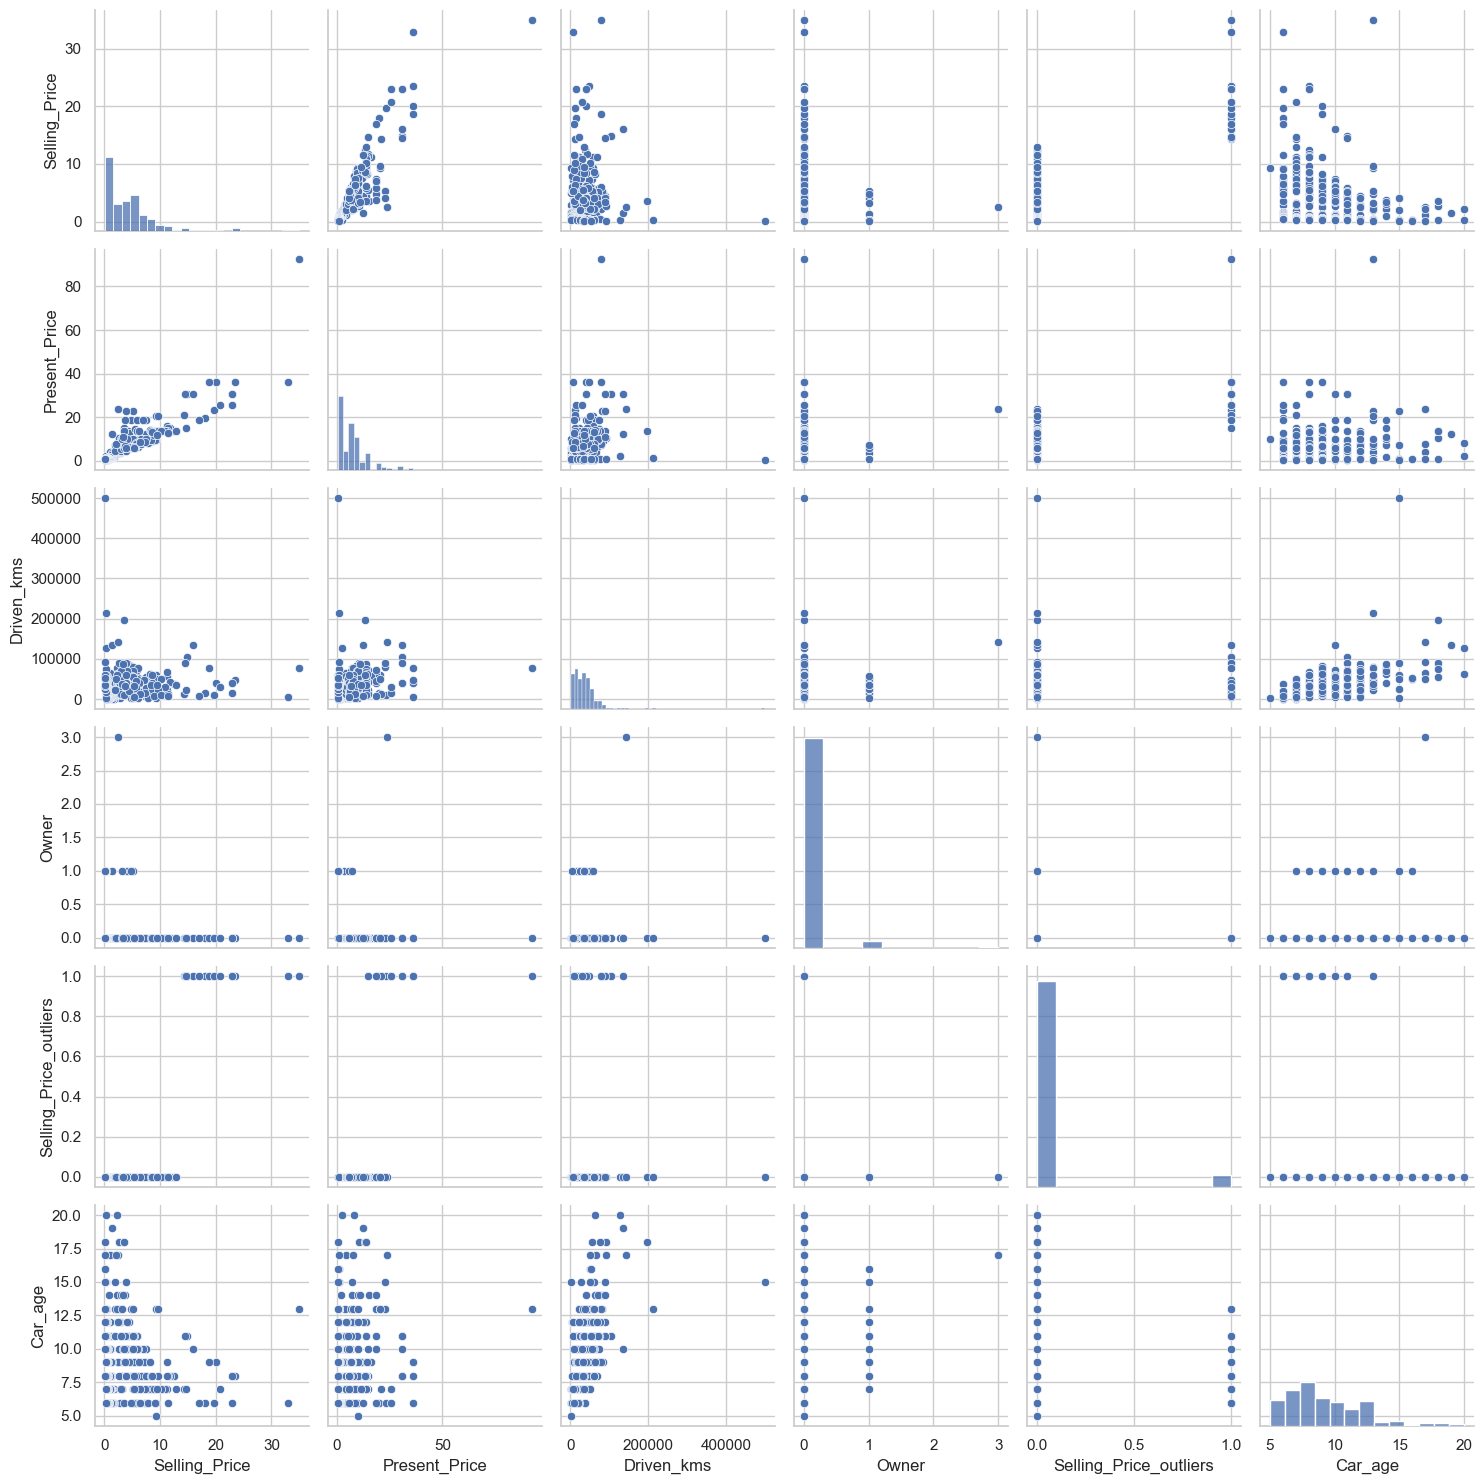

In [39]:
sns.pairplot(df)

In [40]:
X = df_no_multicolinearity.drop('Selling_Price',axis=1)
y = df_no_multicolinearity['Selling_Price']

# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,y)

ExtraTreesRegressor()

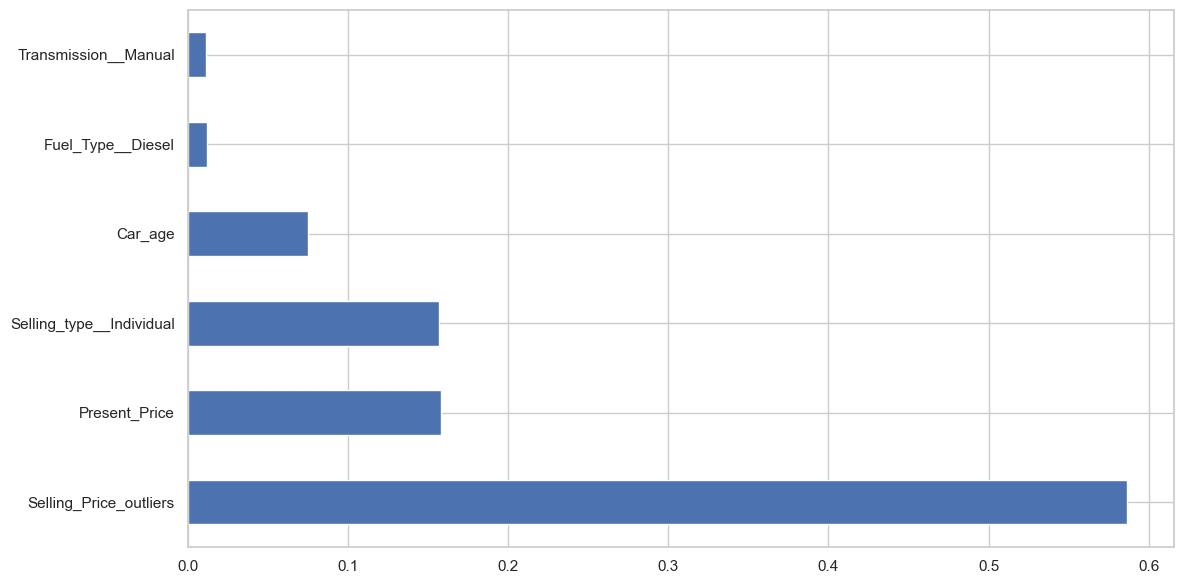

In [41]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [42]:
print(feat_importances.sort_values(ascending=False))

Selling_Price_outliers      0.586525
Present_Price               0.158013
Selling_type__Individual    0.156983
Car_age                     0.075092
Fuel_Type__Diesel           0.011782
Transmission__Manual        0.011038
Owner                       0.000567
dtype: float64


In [43]:
# Selecting useful features.
final_df = df_no_multicolinearity[['Selling_Price', 'Present_Price','Car_age','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]

X = final_df.drop('Selling_Price', axis=1)
y = final_df['Selling_Price']

# Feature Scaling

# feature scallng on training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X[['Present_Price','Car_age']])
input_scaled = scaler.transform(X[['Present_Price','Car_age']])
scaled_data = pd.DataFrame(input_scaled, columns=['Present_Price','Car_age'])

X_scaled =scaled_data.join(X.drop(['Present_Price','Car_age'],axis=1))

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {model.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {model.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 85.21
The Train_accuracy: 88.44


In [47]:
# Evaluate the model
Y_pred = model.predict(X_test)

# Calculate performance metrics

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

mse = mean_squared_error(y_test, Y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error (MSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("mean_absolute_error{:2f}".format(mean_absolute_error(y_test,Y_pred)))

Mean Squared Error (MSE): 1.85
R-squared (R2): 0.85
mean_absolute_error1.207956


In [48]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,Y_pred))
print(metrics.mean_squared_error(y_test,Y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

1.207955719295842
3.407412232827173
1.8459177210339504


In [49]:
metrics.explained_variance_score(y_test,Y_pred)

0.8550197158441174

In [50]:
model.score(X_test, y_test)

0.8520804961634096

In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.89103332 0.86240995 0.80478013 0.828409   0.90510125]
----------------------------------------
SCORE: 0.8583467298691309


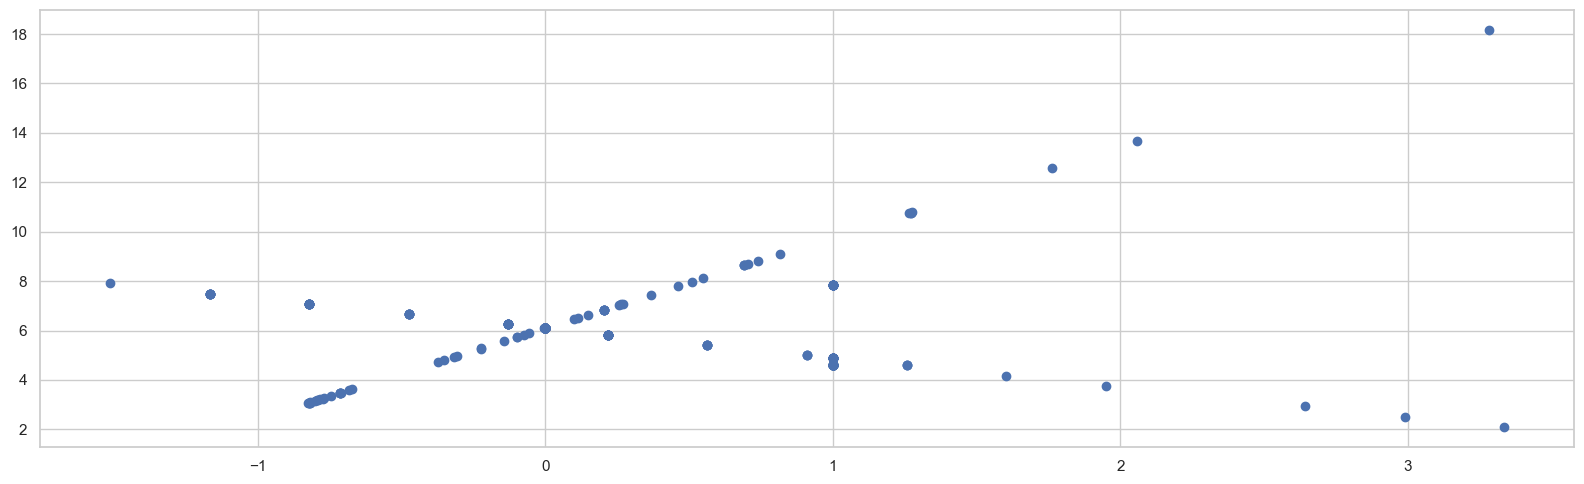

In [52]:
#regr.coef_,regr.intercept_
pr=model.intercept_+(model.coef_*X_test)
plt.scatter(X_test,pr)

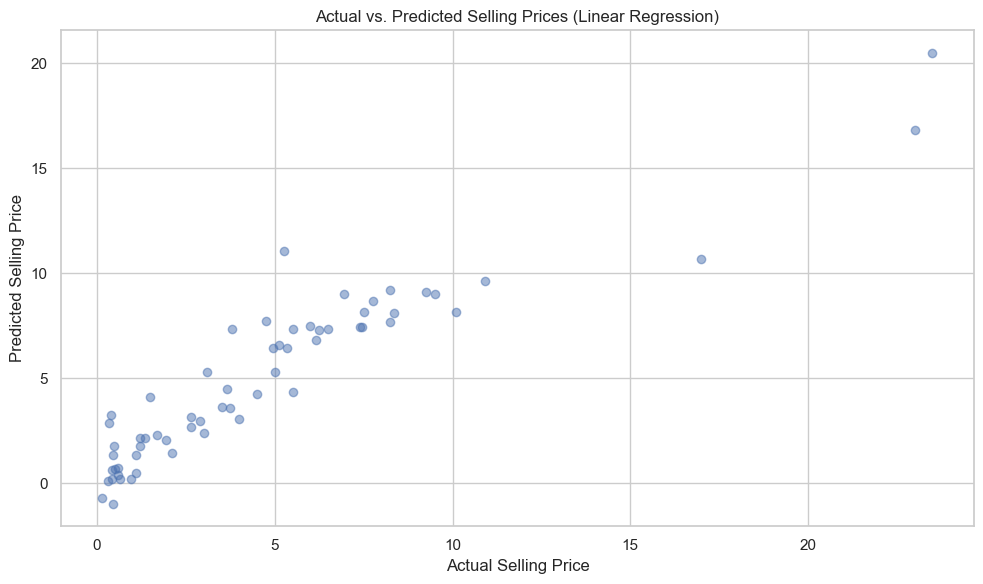

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

In [54]:
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()

lass_reg_model.fit(X_train,y_train)

Lasso()

In [55]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7784027785172158


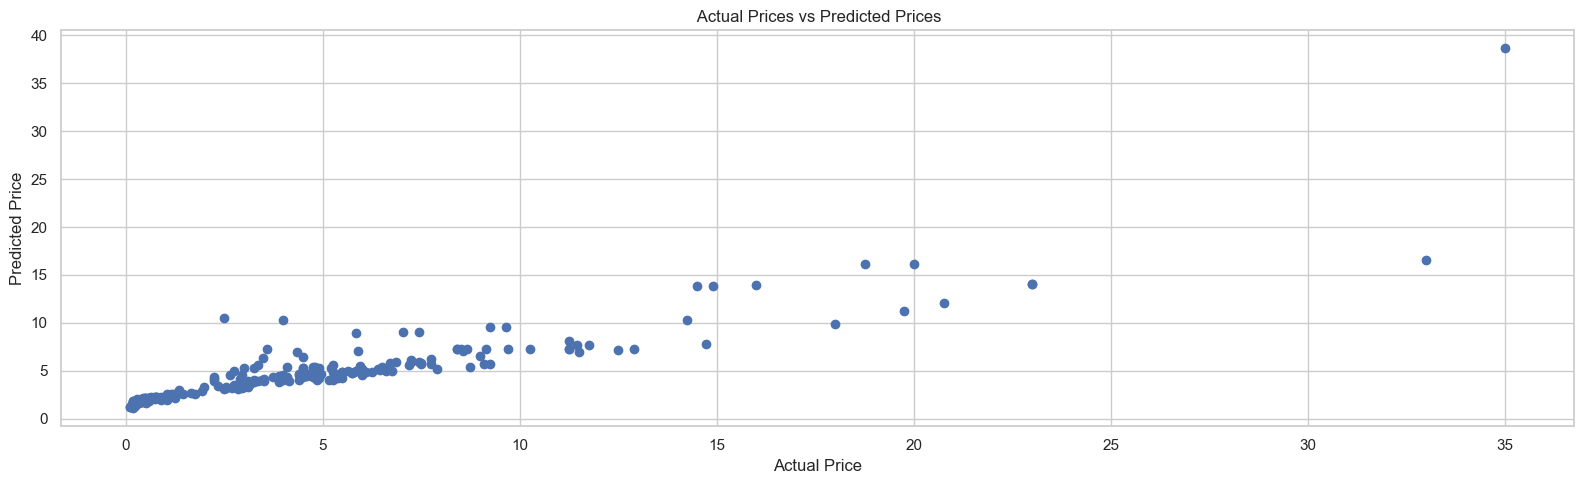

In [56]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [57]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6753171558300559


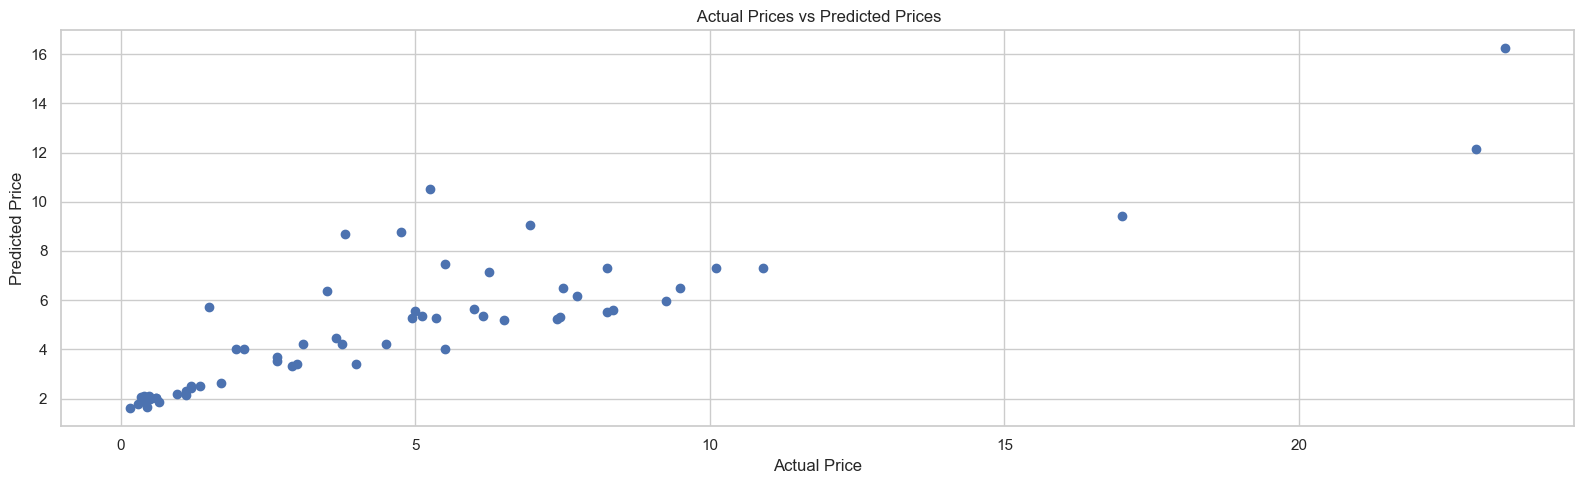

In [58]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(y_test, rf_Y_pred)
rf_r2 = r2_score(y_test, rf_Y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 1.00
Random Forest R-squared (R2): 0.96


In [60]:
print(f'The Test_accuracy: {rf_model.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {rf_model.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 95.65
The Train_accuracy: 98.40


In [61]:
#RandomForestRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,rf_Y_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,rf_Y_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,rf_Y_pred)))

Root_mean_squred_error RandomForestRegressor 1.0013
R2_score RandomForestRegressor 0.956480
mean_absolute_error RandomForestRegressor 0.617047


In [62]:
rf_model.score(X_test, y_test)

0.9564799966027077

In [63]:
score = cross_val_score(rf_model, X_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.92871451 0.90132981 0.78235121 0.86986531 0.94410714]
----------------------------------------
SCORE: 0.8852735956693005


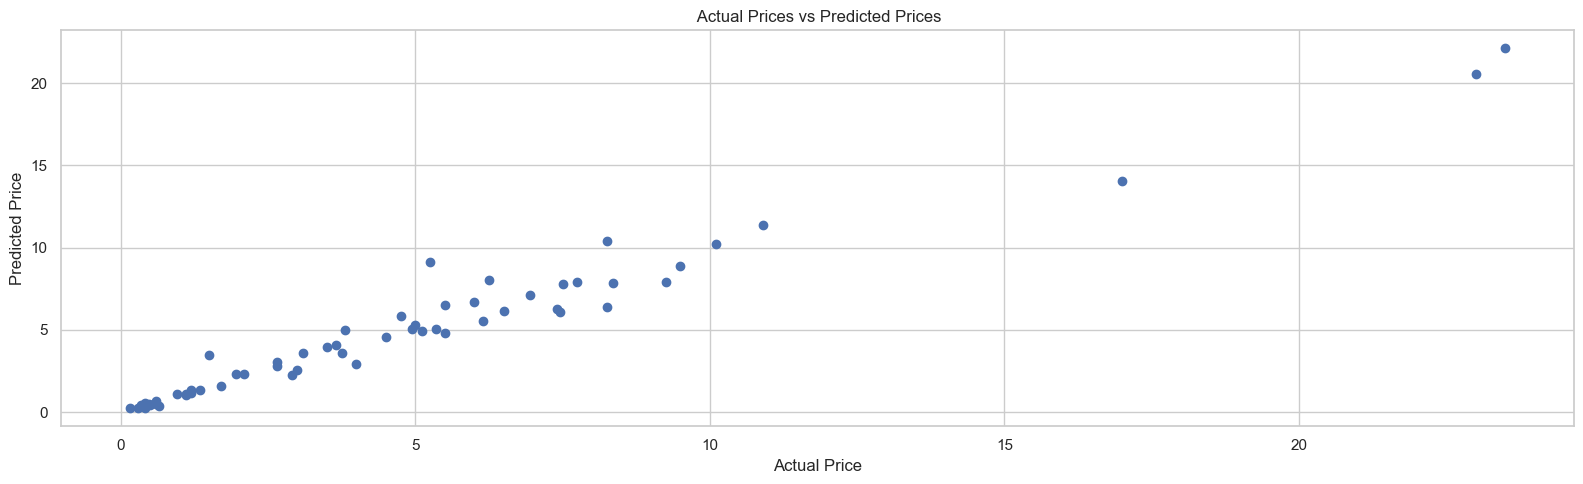

In [64]:
plt.scatter(y_test, rf_Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

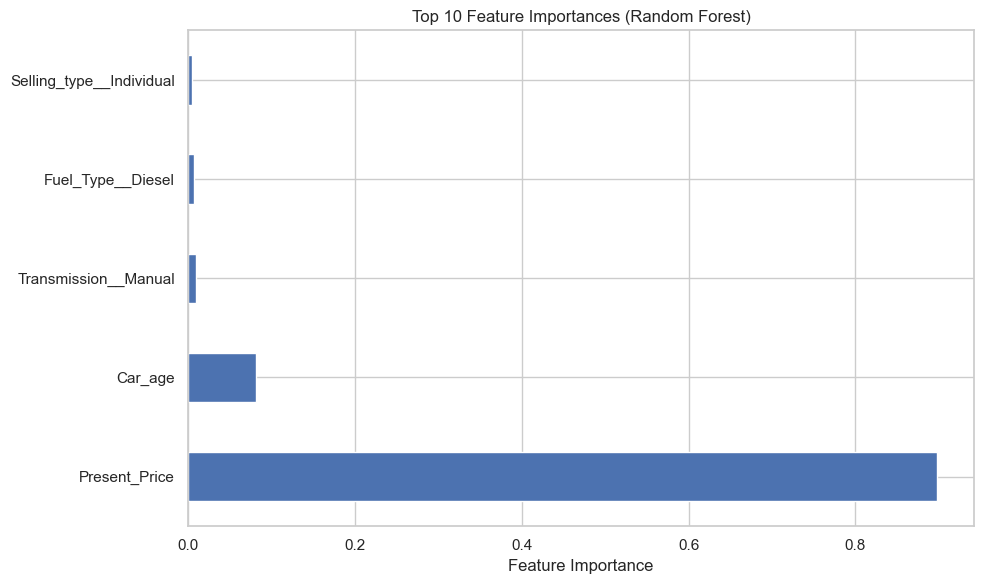

In [65]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [66]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
#and fit the train data to the model
tree.fit(X_train,y_train)
#Prediction of the test dataset
tree_pred=tree.predict(X_test)

In [67]:
#Test score for the data
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 92.69
The Train_accuracy: 99.87


In [68]:
#DecisionTreeRegressor mean_squared_error , r2_score
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error DecisionTreeRegressor 1.2976
R2_score DecisionTreeRegressor 0.926905
mean_absolute_error DecisionTreeRegressor 0.759344


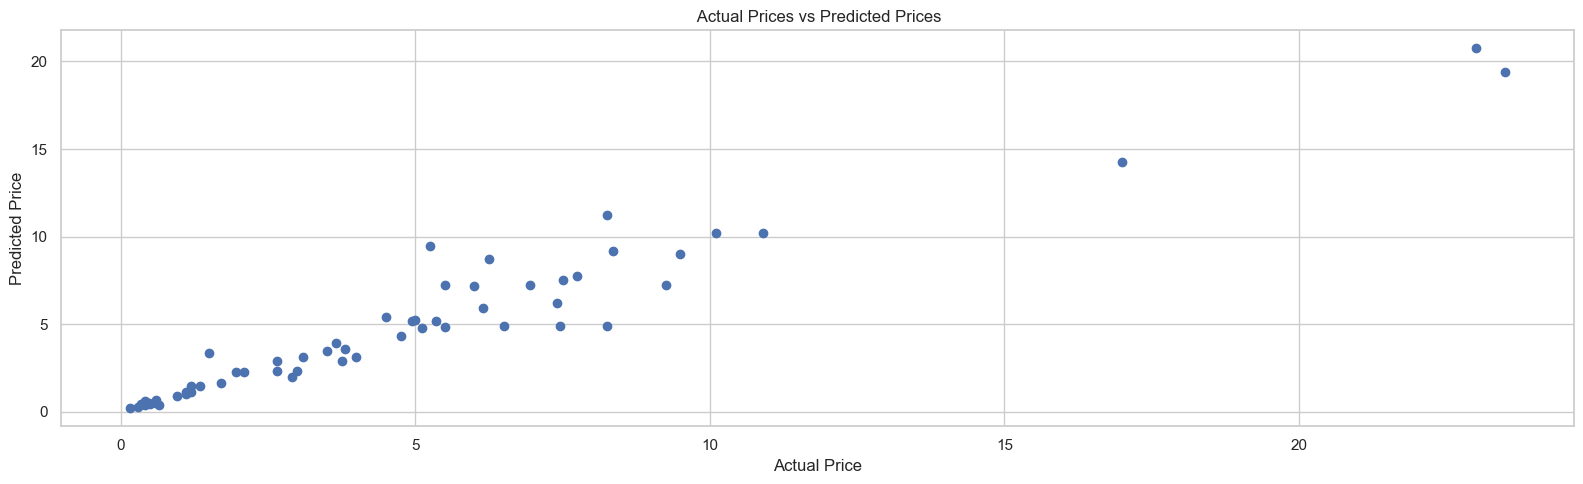

In [69]:
plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [71]:
# Model Building
res = pd.DataFrame()
from sklearn.ensemble import GradientBoostingRegressor
lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

Models = [lr,tree,rf,gb]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)
    print('Predictions are : {}'.format(prediction))
    
    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('='*80)

Model is: LinearRegression()
Training score : 0.8843830218270095
Predictions are : [ 2.85090216  8.12803353  6.41650528 -0.72103319  9.01800124  7.45747829
  1.32336542  0.65668224  1.34213912  7.4813302   9.09094746  0.49298142
  8.12866516  3.24051879  6.83169728  3.16976577  0.19714116 10.69155693
  1.75733112  2.3029391   0.17755181  8.07727328  6.41650528  2.38200739
  0.70357043  3.5644606   5.30530948  2.68891188  2.15374942  1.7513451
  0.20184841  9.20766793 -0.97424783  2.05714484  8.66976944  4.48435841
  7.34281425  7.35723323  2.96516278  7.7425873   3.60354714  4.10888459
  4.22860468  0.6268443   7.32533886  0.37789223  7.29764953 11.06720188
  3.04615146  5.30397652  6.58815672  2.15374942 20.47942208 16.80427774
  7.66208128  9.62400888  4.34541732  9.01503698  1.41857615  7.45010211
  0.11361337]
R2 score is : 0.8520804961634096
MAE : 1.207955719295842
MSE : 3.407412232827173
RMSE : 1.8459177210339504
           Model Name  R2 score       MAE       MSE      RMSE
0  Li

In [72]:
# Model Comparison

models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

Models  R2 score       MAE       MSE      RMSE
3  GradientBoostingRegressor  0.971442  0.500077  0.657845  0.811076
2      RandomForestRegressor  0.968566  0.552216  0.724091  0.850935
1      DecisionTreeRegressor  0.928056  0.760328  1.657263  1.287347
0           LinearRegression  0.852080  1.207956  3.407412  1.845918

In [73]:
# GradientBoostingRegressor

gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

out = pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
df_copy = df.copy()
res = df_copy.merge(out,left_index=True,right_index=True)
res.head(10)

Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
5            9.25           9.83        2071    Diesel       Dealer   
7            6.50           8.61       33429    Diesel       Dealer   
9            7.45           8.92       42367    Diesel       Dealer   
17           7.75          10.79       43000    Diesel       Dealer   
24           2.90           4.41       56879    Petrol       Dealer   
25           3.00           4.99       20000    Petrol       Dealer   
33           6.00           9.95       45000    Diesel       Dealer   
42           1.95           7.15       58000    Petrol       Dealer   
45           7.50          12.04       15000    Petrol       Dealer   
46           2.65           4.89       64532    Petrol       Dealer   

   Transmission  Owner  Selling_Price_outliers  Car_age  Price_actual  \
5        Manual      0                       0        5          9.25   
7        Manual      0                       0        8          6.50   
9        Manual      0                       0        8          7.45   
17       Manual      0                       0        7          7.75   
24       Manual      0                       0       10          2.90   
25       Manual      0                       0       12          3.00   
33       Manual      0                       0        9          6.00   
42       Manual      0                       0       15          1.95   
45    Automatic      0                       0        9          7.50   
46       Manual      0                       0       10          2.65   

    Price_pred  
5     8.223105  
7     6.737466  
9     6.550065  
17    8.349544  
24    2.631044  
25    2.548274  
33    6.676303  
42    2.732159  
45    7.303033  
46    2.646367

In [74]:
#Test score for the data
print(f'The Test_accuracy: {gb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {gb.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 97.12
The Train_accuracy: 99.48


In [75]:
# GradientBoostingRegressor mean_absolute_error , r2_score
print("R2_score {:4f}".format(r2_score(y_test,y_pred)))
print("mean_absolute_error {:4f}".format(mean_absolute_error(y_test,y_pred)))

R2_score 0.971193
mean_absolute_error 0.501189
